# Проект: Исследовательский анализ данных

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.  

Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

План работ и основных задач:

- открыть файл и изучить содержимое  
- провести предобработку данных:
    - пропуски
    - дубликаты  
- рассчитать и добавить новые данные  
- провести исследовательский анализ данных  
- провести анализ рыночных параметров  
- сделать выводы  

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Изучение данных из файла. 

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except FileNotFoundError:
    data = pd.read_csv('real_estate_data.csv', sep = '\t')

In [3]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.columns.sort_values()

Index(['airports_nearest', 'balcony', 'ceiling_height', 'cityCenters_nearest',
       'days_exposition', 'first_day_exposition', 'floor', 'floors_total',
       'is_apartment', 'kitchen_area', 'last_price', 'living_area',
       'locality_name', 'open_plan', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'rooms', 'studio', 'total_area',
       'total_images'],
      dtype='object')

### Описание данных и переменных

В таблице 22 столбца. Вот их описание:

`airports_nearest` - расстояние до ближайшего аэропорта в метрах (м)  
`balcony` - число балконов  
`ceiling_height` - высота потолков (м)  
`cityCenters_nearest` - расстояние до центра города (м)  
`days_exposition` - сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` - дата публикации  
`floor` - этаж  
`floors_total` - всего этажей в доме  
`is_apartment` - апартаменты (булев тип)  
`kitchen_area` - площадь кухни в квадратных метрах (м²)  
`last_price` - цена на момент снятия с публикации  
`living_area` - жилая площадь в квадратных метрах (м²)  
`locality_name` - название населённого пункта  
`open_plan` - свободная планировка (булев тип)  
`parks_around3000` - число парков в радиусе 3 км  
`parks_nearest` - расстояние до ближайшего парка (м)  
`ponds_around3000` - число водоёмов в радиусе 3 км  
`ponds_nearest` - расстояние до ближайшего водоёма (м)  
`rooms` - число комнат  
`studio` - квартира-студия (булев тип)  
`total_area` - площадь квартиры в квадратных метрах (м²)  
`total_images` - число фотографий квартиры в объявлении  

### Гистограммы по всем столбцам таблицы с числовыми значениями (float, int)

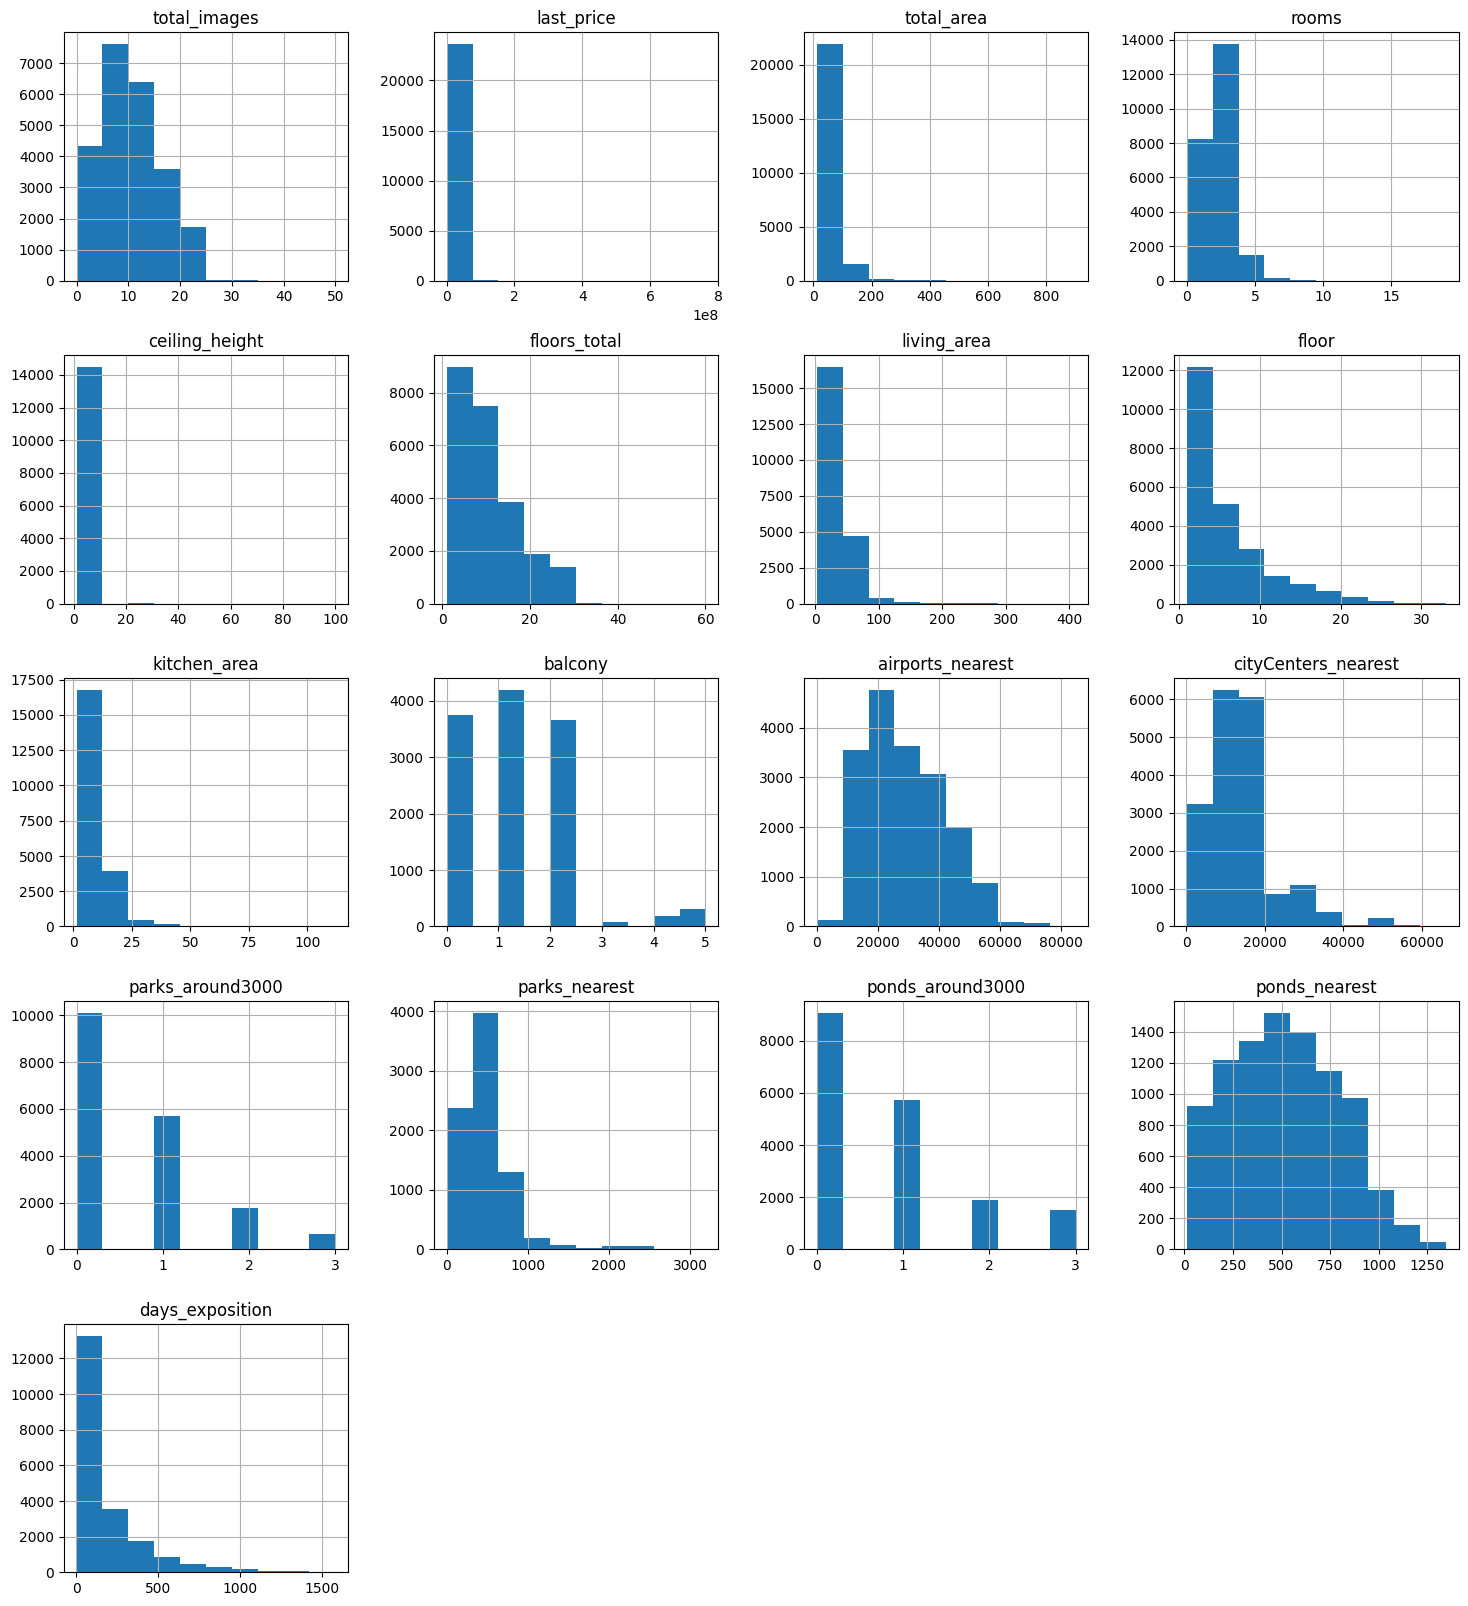

In [6]:
data.hist(figsize=(18, 20))
plt.show()

### Вывод

- В таблице присутсвуют колонки с пустыми значениями.
- В наименованиях колонок присутствуют некорректные наименования.
- Некоторые гистограммы не похожи на распределения, скорее показывают выбросы данных.

## Предобработка данных

### Корректировка наименований

In [7]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
#убедимся что поменяли правильно
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Пропуски в таблице

In [8]:
def percentage_of_omissions(data):
    (
        (data.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind = 'barh', figsize = (18,8), legend = False, fontsize = 16, grid =True)
        .set_title('% пропусков в данных', fontsize = 22, color = 'SteelBlue')
    )
    plt.xlabel('% пропуска', size=14)
    plt.ylabel('колонки датасета', size=14)
    plt.xlim(0, 100) 
    plt.show()

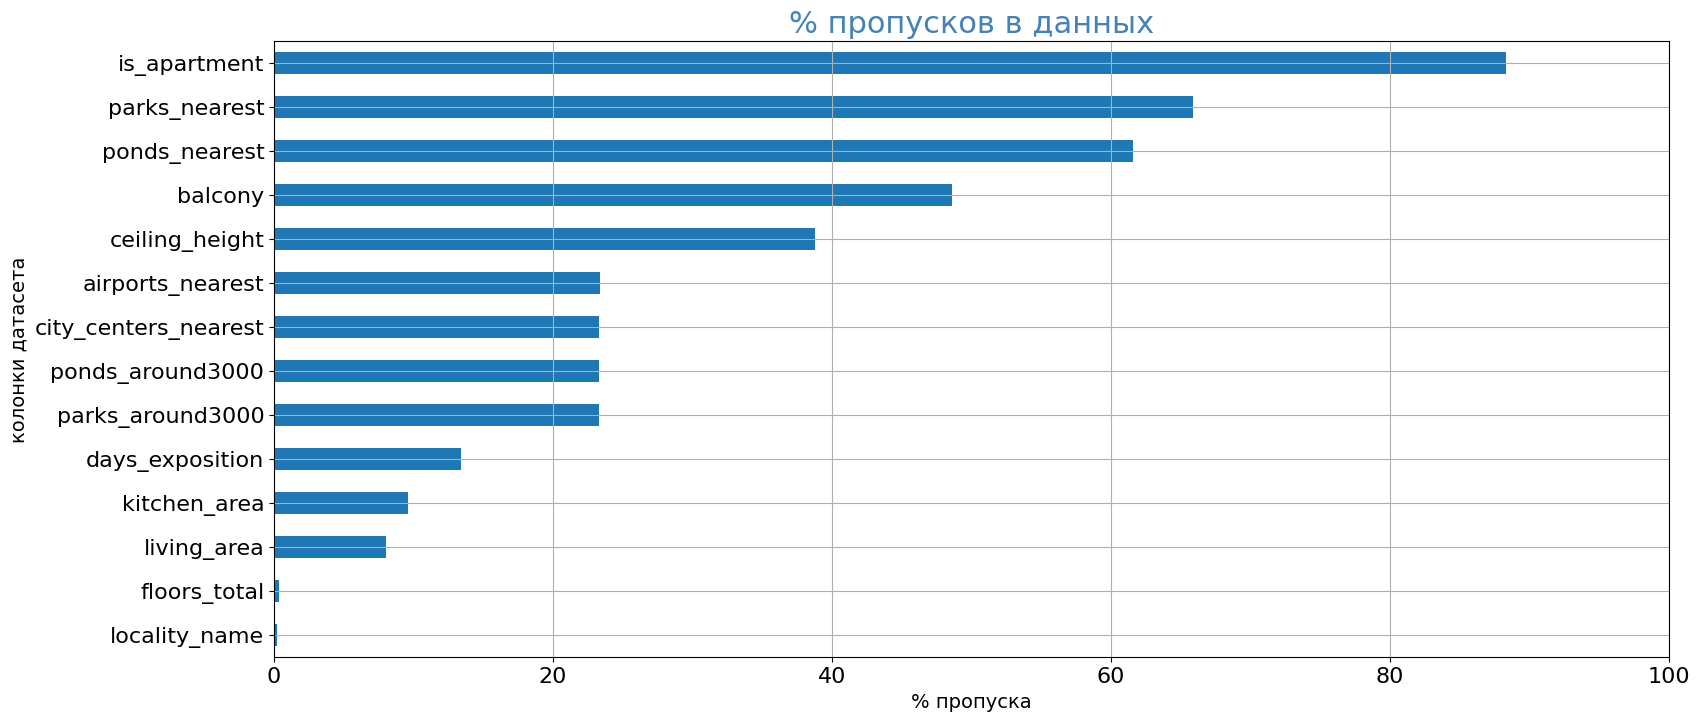

In [9]:
percentage_of_omissions(data)

Благодаря наглядному представлению пропусков можно заметить, что количество пропусков в колонках `airports_nearest`, `city_centers_nearest`,`parks_around3000`,`ponds_around3000` одинаково, что может иметь взаимосвязь.  
А колонки `floors_total` и `locality_name` имеют менее 10% пропусков, что в данном случае 

#### Пропуски в `is_apartment`

In [10]:
# определяем количество  пропусков
data['is_apartment'].isna().mean()*100

88.2906451749019

88% пропусуков - это безусловно очень много. Но вероятнее всего, у кого действительно аппартаменты - те знают, что у них аппартаменты, остальные скорее всего просто пропускали это пункт, так как их имущество не относится к такому типу. На основании этой логики заполню пропущенные значения - False.

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [12]:
# проверяем количество  пропусков
data['is_apartment'].isna().mean()*100

0.0

#### Пропуски в прудах и парках
`parks_around3000` / `parks_nearest` / `ponds_around3000` / `ponds_nearest`

In [13]:
#определяем % пропусков
data['parks_around3000'].isna().mean()*100

23.2836828558167

In [14]:
#определяем % пропусков
data['parks_nearest'].isna().mean()*100

65.90995400649817

In [15]:
#определяем % пропусков
data['ponds_around3000'].isna().mean()*100

23.2836828558167

In [16]:
#определяем % пропусков
data['ponds_nearest'].isna().mean()*100

61.55955947508333

Сначала разберемся с расстоянием до ближайших парков и прудов: Если не заполнено поле "число парков в радиусе 3 км" и "число прудов в радиусе 3 км" не заполнены, то "расстояние до ближайшего парка" и "расстояние до ближайшего пруда" - можно проставить 0, так как люди скорее всего даже не знают где там ближайший пруд, да и это уже будет не близко.

In [17]:
data.loc[data['parks_nearest'].isna() & data['parks_around3000'].isna(), ['parks_nearest', 'parks_around3000']] = 0
data.loc[data['ponds_nearest'].isna() & data['ponds_around3000'].isna(), ['ponds_nearest', 'ponds_around3000']] = 0

Перепроверим, что мы заполнили все пропуски

In [18]:
#определяем %  пропусков
data['parks_nearest'].isna().mean()*100

42.62627115068146

In [19]:
#определяем %  пропусков
data['ponds_nearest'].isna().mean()*100

38.27587661926663

Все еще остались пропущенные данные.
Заполним их медианой по ЛО, так как другой возможности заменить эти данные не представляется. Так же поступим и с числом парков и прудов в радиусе 3 км.

In [20]:
#Заменим на 0 значения где и расстояние и число (парков/водоёмов) пустое
data.loc[(data['parks_nearest'].isna()),'parks_nearest']=data['parks_nearest'].median()
data.loc[(data['parks_around3000'].isna()) & (data['parks_nearest'] == 0),'parks_around3000']=0
data.loc[(data['ponds_nearest'].isna()),'ponds_nearest']=data['ponds_nearest'].median()
data.loc[(data['ponds_around3000'].isna()) & (data['ponds_nearest'] == 0),'ponds_around3000']=0

In [21]:
#проверим, заменили ли мы значения:
data.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around3000         0.000000
parks_nearest            0.000000
ponds_around3000         0.000000
ponds_nearest            0.000000
days_exposition         13.422507
dtype: float64

#### Пропуски в `balcony`

In [22]:
#определяем %  пропусков
data['balcony'].isna().mean()*100

48.605426389299126

Вероятнее всего, люди при заполнении количества балконов пропускали этот пункт, так как у них нет балконов. Поэтому заменим пропуски на 0. Навсякий случай взглянем на данные.

In [23]:
data[data['balcony'].isna()].head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
16            11   6700000.0       82.00  2017-11-23T00:00:00      3   
19            16  14200000.0      121.00  2019-01-09T00:00:00      3   
23            11   2950000.0       32.00  2016-10-29T00:00:00      1   
26             6   4050000.0       60.00  2017-04-28T00:00:00      4   
30            12   2200000.0       32.80  2018-02-19T00:00:00      1   

    ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0             2.70          16.0        51.00      8         False  ...   
4             3.03          14.0        32.00     13         False  ...   
5              NaN          12.0        14.40      5         False  ...   
8              NaN          27.0        15.43     26         False  ...   
10            2.67          12.0        20.30      3         False  ...   
16            3.05           5.0        55.60      1         False  ...   
19            2.75          16.0        76.00      8         False  ...   
23            2.60           9.0        17.70      9         False  ...   
26             NaN           5.0        43.00      4         False  ...   
30             NaN           9.0          NaN      2         False  ...   

    kitchen_area  balcony              locality_name  airports_nearest  \
0          25.00      NaN            Санкт-Петербург           18863.0   
4          41.00      NaN            Санкт-Петербург           31856.0   
5           9.10      NaN  городской посёлок Янино-1               NaN   
8           8.81      NaN             посёлок Мурино               NaN   
10          8.50      NaN            Санкт-Петербург           38357.0   
16          9.00      NaN            Санкт-Петербург           22108.0   
19         12.00      NaN            Санкт-Петербург           38900.0   
23          6.10      NaN            Санкт-Петербург           15414.0   
26          7.00      NaN            Санкт-Петербург           11580.0   
30           NaN      NaN                   Коммунар               NaN   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028.0               1.0          482.0               2.0   
4                8098.0               2.0          112.0               1.0   
5                   NaN               0.0            0.0               0.0   
8                   NaN               0.0            0.0               0.0   
10              13878.0               1.0          310.0               2.0   
16              10698.0               3.0          420.0               0.0   
19              12843.0               0.0          209.0               0.0   
23              14211.0               2.0          517.0               1.0   
26              10510.0               0.0          209.0               1.0   
30                  NaN               0.0            0.0               0.0   

    ponds_nearest  days_exposition  
0           755.0              NaN  
4            48.0            121.0  
5             0.0             55.0  
8             0.0            189.0  
10          553.0            137.0  
16          243.5            397.0  
19          243.5             97.0  
23          190.0            615.0  
26           95.0            265.0  
30            0.0             63.0  

[10 rows x 22 columns]

Никакой зависимости не видно, можно заменять пропуски на 0

In [24]:
#заменяем пропуски на 0
data['balcony'] = data['balcony'].fillna(0)

In [25]:
#проверим, заменили ли мы значения:
data['balcony'].isna().mean()*100

0.0

#### Пропуски в `ceiling_height`

In [26]:
#определяем %  пропусков
data['ceiling_height'].isna().mean()*100

38.799105447487236

38,79 % данных отсутствует. Заполним медианой относительно своего района.

In [27]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name,'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name),'ceiling_height']= median

# print(data['ceiling_height'].median())
# все что не заполнилось - заполним медианой по Ленинградской области
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()

In [28]:
#проверим, заменили ли мы значения:
data['ceiling_height'].isna().mean()*100

0.0

#### Пропуски в `airports_nearest`

In [29]:
#определяем %  пропусков
data['airports_nearest'].isna().mean()*100

23.384952951601335

In [30]:
data_isna_airports = data[data['airports_nearest'].isna()==False]
data_isna_airports['locality_name'].nunique()

28

Всего 27 из 372 населенных пунктов имеют заполненную колонку `airports_nearest`

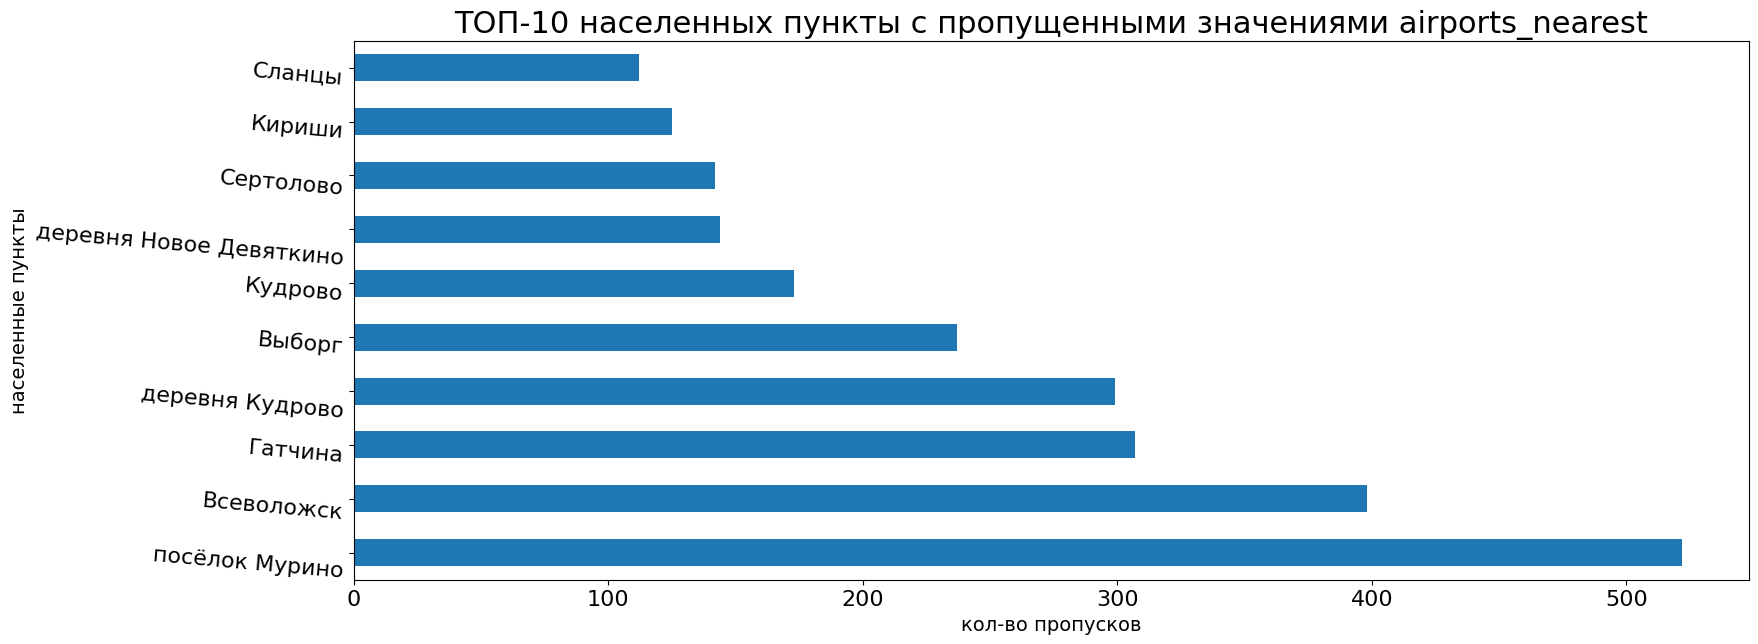

In [31]:
data_isna_airports_true = data[data['airports_nearest'].isna()==True]
(
    data_isna_airports_true.groupby('locality_name')['locality_name'].count()
    .sort_values(ascending=False)
    .head(10)
    .plot(kind = 'barh', figsize = (18,7), legend = False, fontsize = 16, rot = -5)
)

plt.title('ТОП-10 населенных пункты с пропущенными значениями airports_nearest', size = 22)
plt.xlabel('кол-во пропусков', size=14)
plt.ylabel('населенные пункты', size=14)
plt.show()

Удалить эти значения также не можем, так как большая часть обьявлений располагается в пригороде Санкт-Петербурга, что очень повлияет на дальнейшее исследование.

Пропуски заполним медианным значением в зависимости от населенного пункта, все что не заполнится - медианным значением по Ленинградской области, так как аэропорт один в городе.

In [32]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name,'airports_nearest'].median()
    data.loc[(data['airports_nearest'].isna()) & (data['locality_name'] == locality_name),'airports_nearest']= median

# все что не заполнилось - заполним медианой по Ленинградской области
data.loc[data['airports_nearest'].isna(),'airports_nearest'] = data['airports_nearest'].median()

In [33]:
#проверим, заменили ли мы значения:
data['airports_nearest'].isna().mean()*100

0.0

#### Пропуски в `city_centers_nearest`

In [34]:
#определяем %  пропусков
data['city_centers_nearest'].isna().mean()*100

23.28790244314106

In [35]:
data_isna_city = data[data['city_centers_nearest'].isna()==False]
data_isna_city['locality_name'].nunique()

28

Количество пропусков `city_centers_nearest` совпадает c `airports_nearest`. Интересно совпадают ли они полностью

In [36]:
data_isna_city.equals(data_isna_airports)

False

Посмотрим на населенные пункты

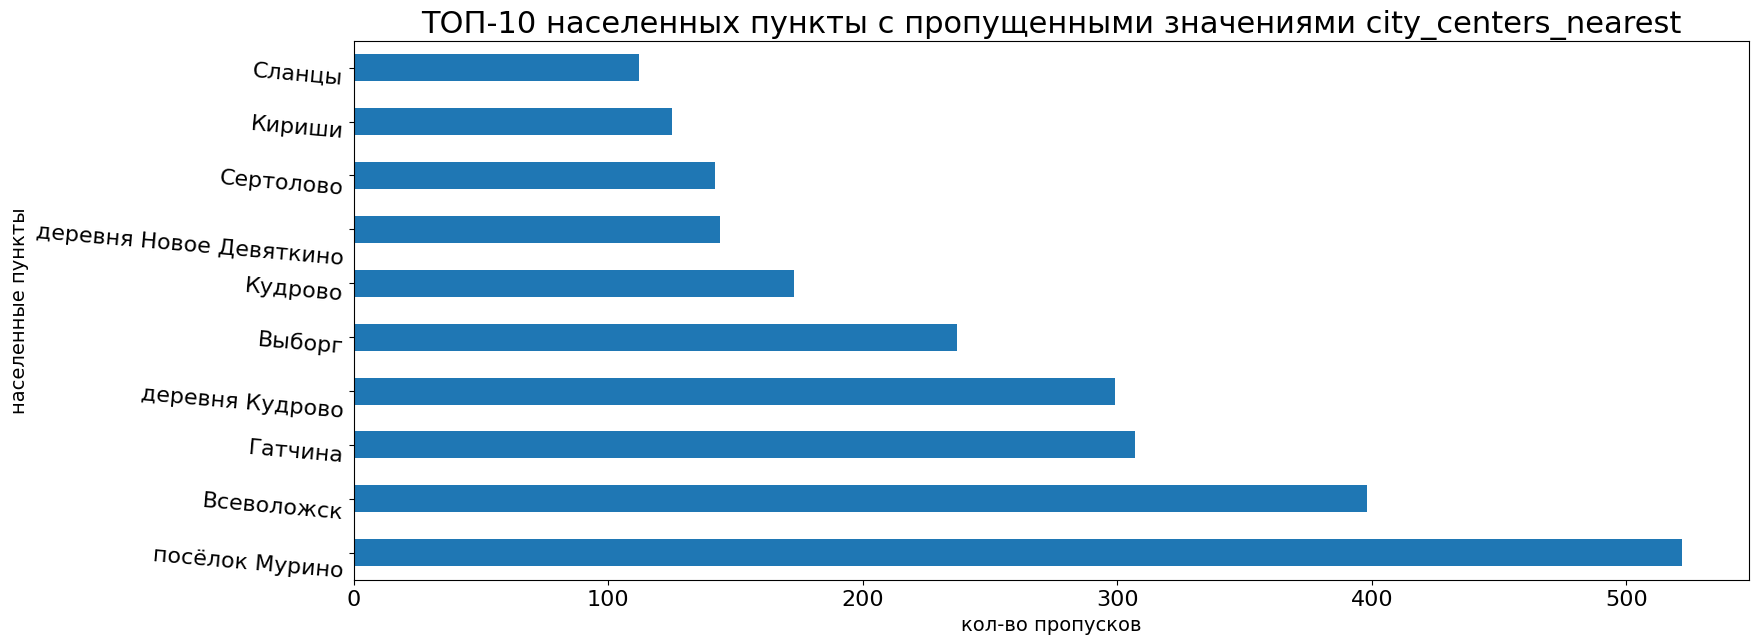

In [37]:
data_isna_city_true = data[data['city_centers_nearest'].isna()==True]
(
    data_isna_city_true.groupby('locality_name')['locality_name'].count()
    .sort_values(ascending=False)
    .head(10)
    .plot(kind = 'barh', figsize = (18,7), legend = False, fontsize = 16, rot = -5)
)

plt.title('ТОП-10 населенных пункты с пропущенными значениями city_centers_nearest', size = 22)
plt.xlabel('кол-во пропусков', size=14)
plt.ylabel('населенные пункты', size=14)
plt.show()

И все же населенные пункты совпадают, перепроверим отдельно

In [38]:
data_isna_city['locality_name'].unique()==data_isna_airports['locality_name'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [39]:
for name in data_isna_city['locality_name'].unique():
    if name not in data_isna_airports['locality_name'].unique():
        print(name)

nan


Все совпало, кроме одного населенного пункта. Вероятно все владельцы за КАД не указывают расстояние до центра и расстояние до аэропорта, чтобы не сбивать с толку людей. Так как данные поселки действительно находятся в округе Санкт-Петербурга, а некоторые из них являются почти частью города. Отсюда же так же следует вывод, что эти данные удалить мы не можем.

Пропуски заполним медианным значением в зависимости от населенного пункта, все что не заполнится - медианным значением по Ленинградской области, так как центр города один.

In [40]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name,'city_centers_nearest'].median()
    data.loc[(data['city_centers_nearest'].isna()) & (data['locality_name'] == locality_name),'city_centers_nearest']= median
# все что не заполнилось - заполним медианой по Ленинградской области
data.loc[data['city_centers_nearest'].isna(),'city_centers_nearest'] = data['city_centers_nearest'].median()

In [41]:
#проверим, заменили ли мы значения:
data['city_centers_nearest'].isna().mean()*100

0.0

#### Пропуски в `days_exposition`

In [42]:
#определяем количество пропусков
data['days_exposition'].isna().sum()

3181

Прпоуски оставляем, так как квартиры еще не проданы.

#### Вывод

Еще раз взглянем на пропущенные значения

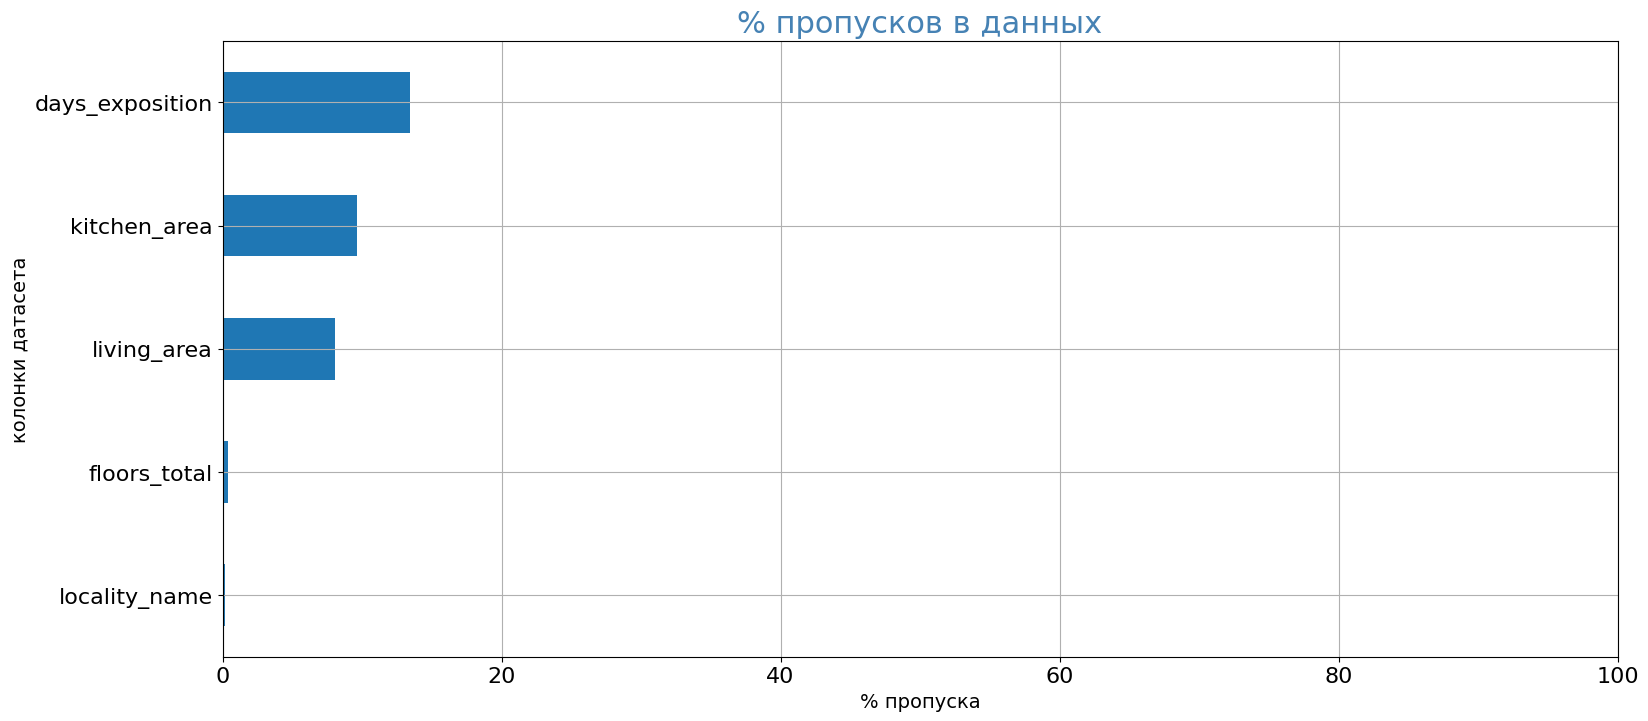

In [43]:
percentage_of_omissions(data)

В `days_exposition` мы оставили пропуски, несмотря на то, что их больше 10%, их удаление не целесообразно.
Остальные пропуски не превышают 10%. Взглянем на количественные показатели этих колонок.

In [44]:
#финально проверяем пропуски в шт
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name             49
airports_nearest           0
city_centers_nearest       0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

Пропусков нет.

### Типы данных

Необходимо произвести изменение типов данных в некоторых столбцах. Самый распространенный случай в датафрейме - вещественный тип данных в тех столбцах, где подразумевается целочисленный. Тип данных в следующих столбцах должен быть изменен с float на int: `balcony` (балконов не может быть 1.5), ~~`days_exposition` (дней не может быть 1.5 по постановке задачи), `floors_total` (количество этажей не может быть 1.5)~~, `parks_around3000` и `ponds_around3000` (количество парков и прудов не может быть 1.5). Также надо привести дату в поле `first_day_exposition` к читабельному виду (убрать разделитель 'T'), и, наконец, поле `is_apartment`, исходя из описания, имеет тип bool, а не object. Произведем изменения.

In [45]:
#меняем тип данных и проверяем
for columns in ['balcony','parks_around3000','ponds_around3000']:
    data[columns] = data[columns].astype(int)
    print(f'Тип в {columns} изменен на {data[columns].dtype}')

Тип в balcony изменен на int64
Тип в parks_around3000 изменен на int64
Тип в ponds_around3000 изменен на int64


In [46]:
#меняем тип данных и проверяем
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].dtype

dtype('<M8[ns]')

In [47]:
#меняем тип данных и проверяем
data['is_apartment'] = data['is_apartment'].astype(bool)
data['is_apartment'].dtype

dtype('bool')

В `days_exposition` и `floors_total` не представляется возможным поменять тип данных, так как имеются пропуски.

### Дубликаты

In [48]:
#проверка на явные дубликаты
data.duplicated().sum()

0

Явных дубликатов нет. Проведем анализ столбца `locality_name` на наличие неявных дублей. Выведем уникальные значения

In [49]:
#поиск уникальных значений
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Из неявных дубликатов виден только "поселок Лисий нос". Его можно убрать путем замены "ё" на "е"

In [50]:
#Заменяем все "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [51]:
#проверяем уникальные значения
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [52]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [53]:
# check
data.locality_name.nunique()

323

### Выбивающиеся значения

Посмотрим на аномалии в значениях числовых полей датафрейма с помощью ящиков с усами.

<Figure size 640x480 with 0 Axes>

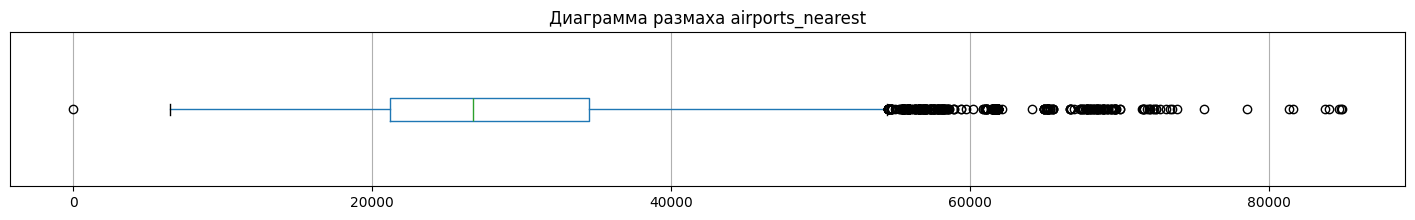

<Figure size 640x480 with 0 Axes>

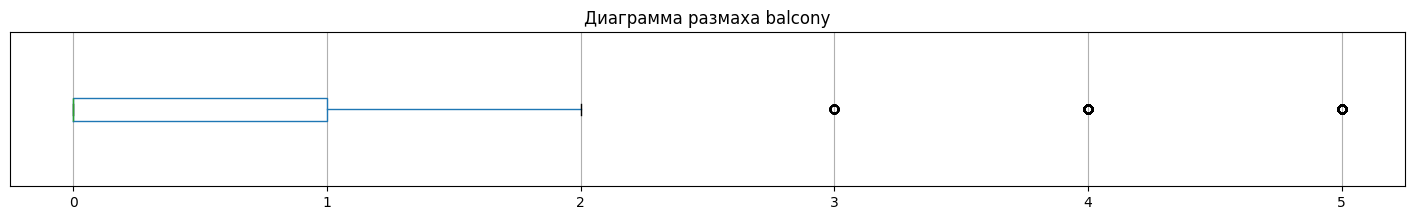

<Figure size 640x480 with 0 Axes>

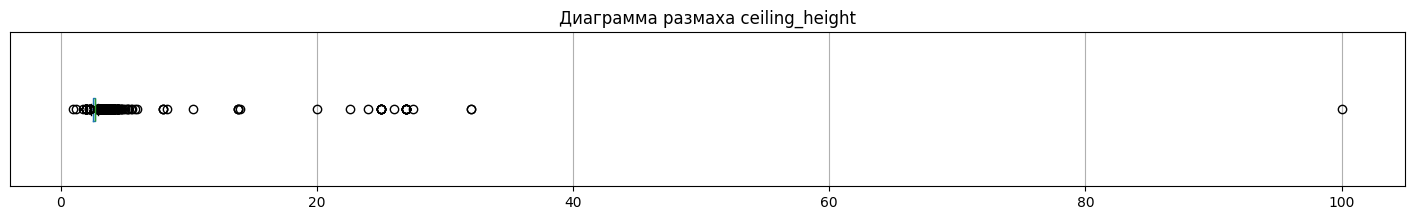

<Figure size 640x480 with 0 Axes>

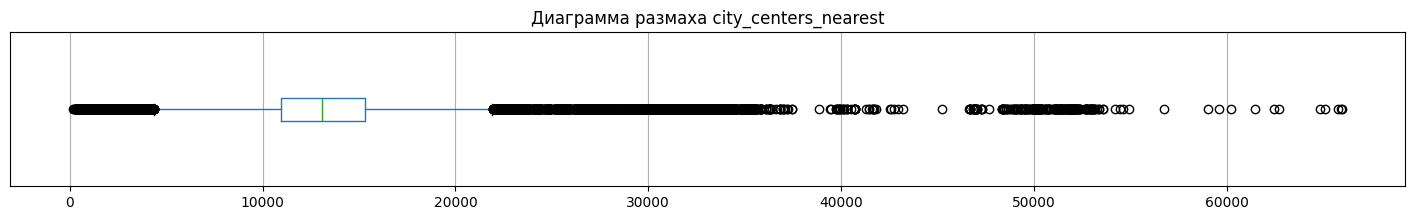

<Figure size 640x480 with 0 Axes>

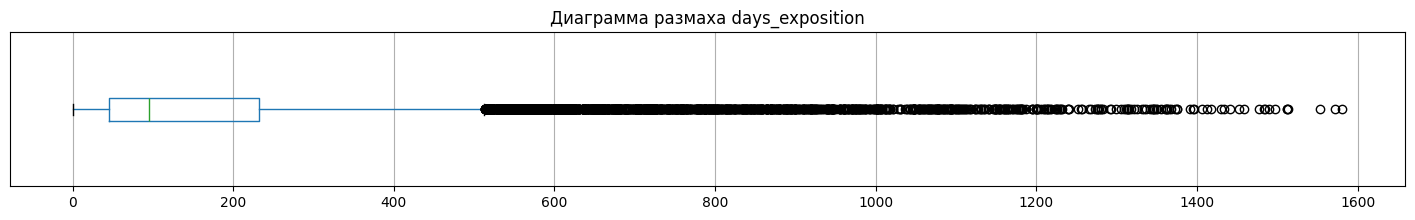

<Figure size 640x480 with 0 Axes>

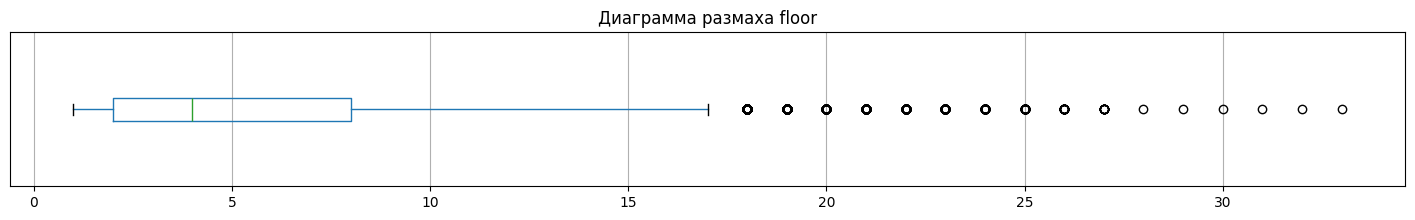

<Figure size 640x480 with 0 Axes>

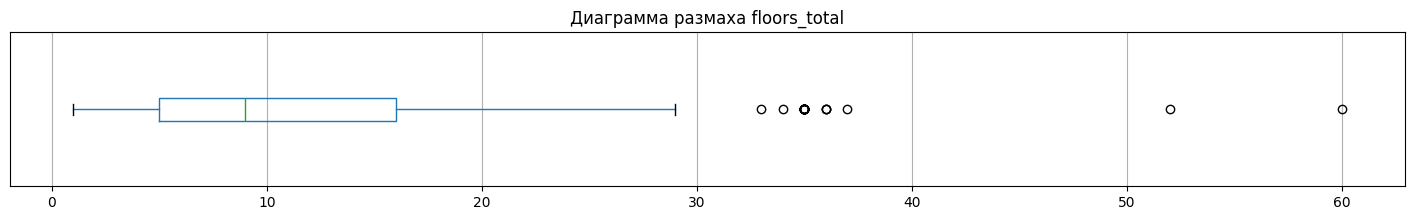

<Figure size 640x480 with 0 Axes>

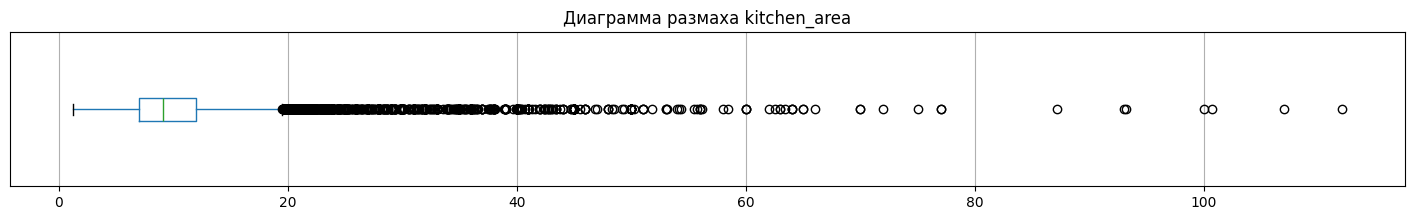

<Figure size 640x480 with 0 Axes>

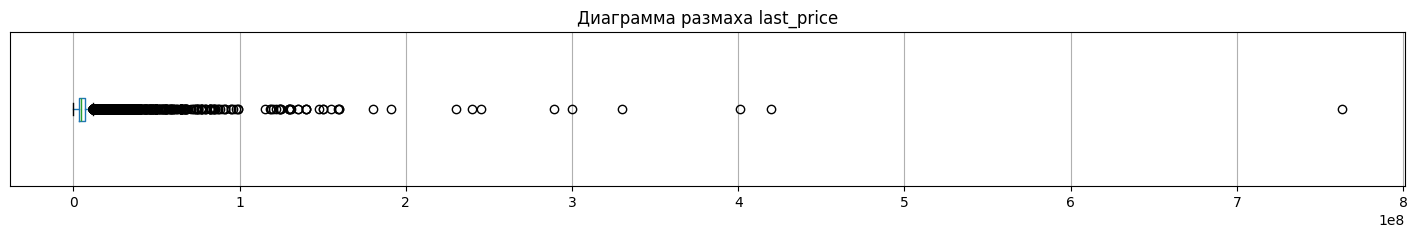

<Figure size 640x480 with 0 Axes>

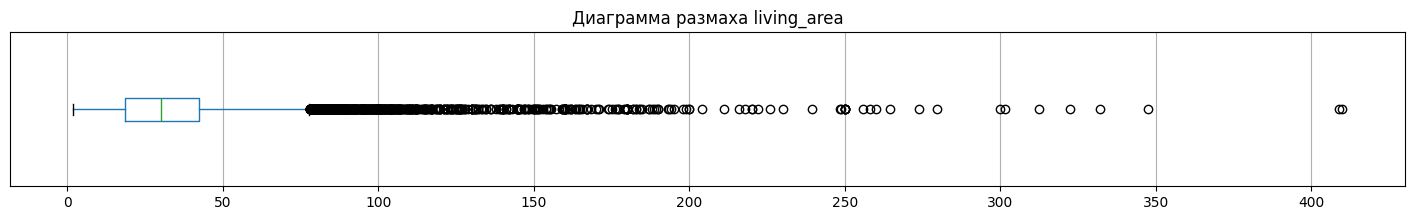

<Figure size 640x480 with 0 Axes>

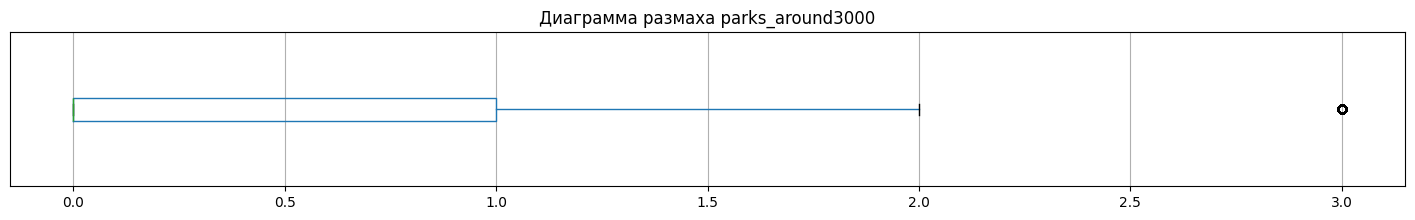

<Figure size 640x480 with 0 Axes>

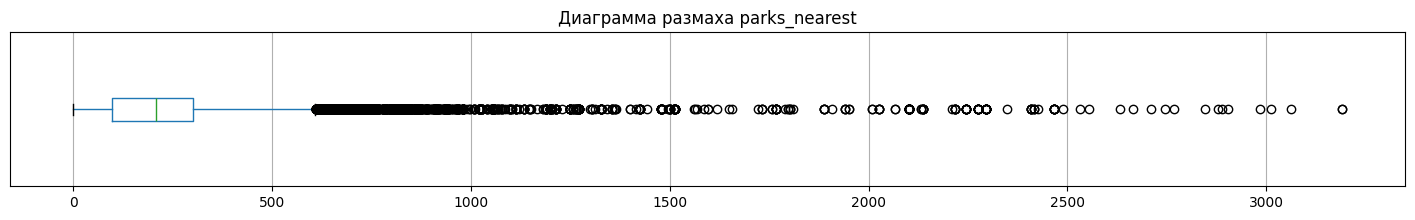

<Figure size 640x480 with 0 Axes>

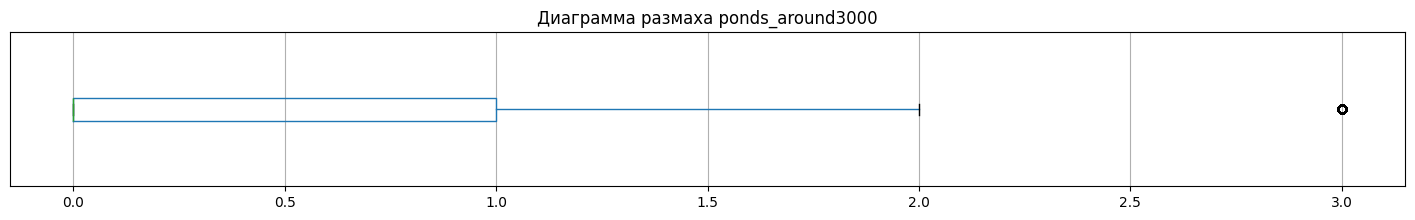

<Figure size 640x480 with 0 Axes>

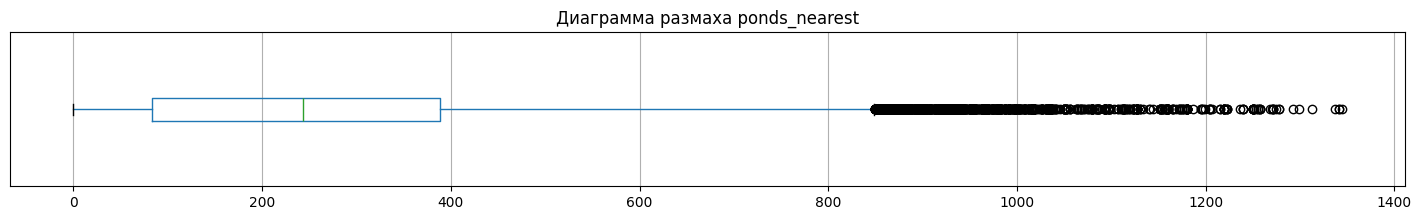

<Figure size 640x480 with 0 Axes>

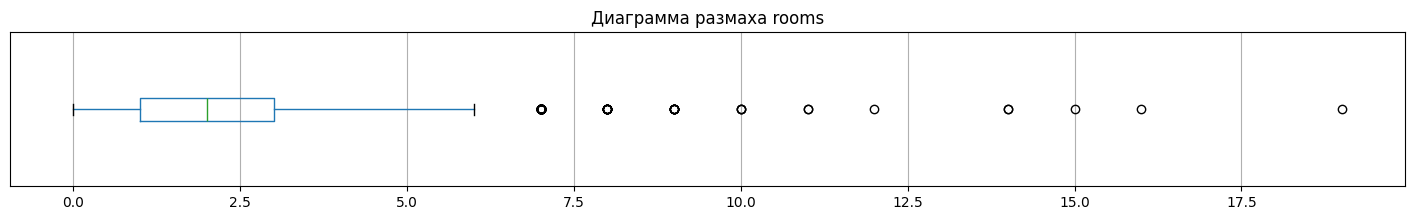

<Figure size 640x480 with 0 Axes>

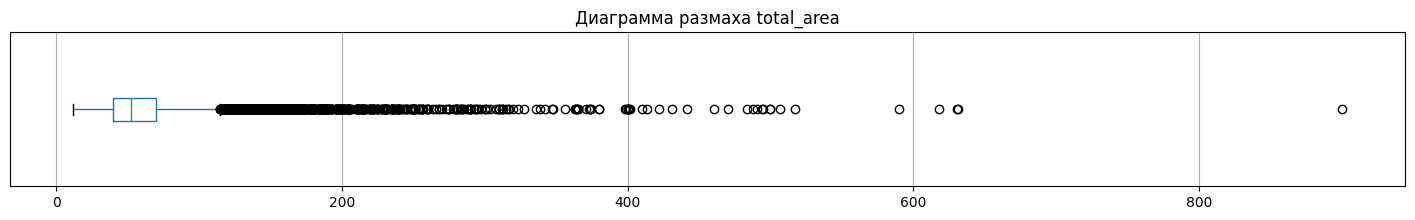

<Figure size 640x480 with 0 Axes>

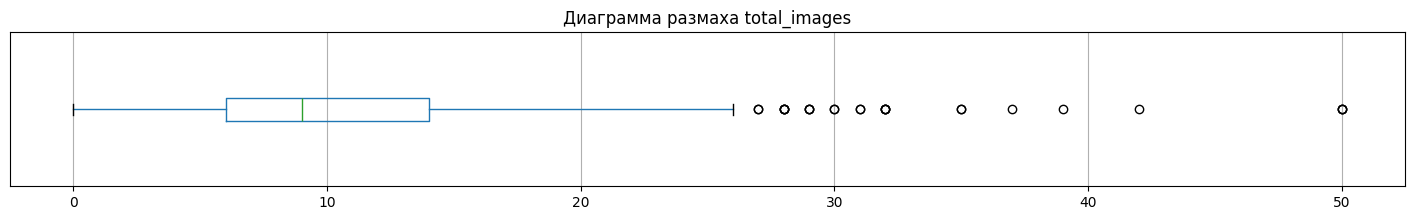

In [54]:
#построим ящики с усами
for_check = ['airports_nearest',
             'balcony',
             'ceiling_height',
             'city_centers_nearest',
             'days_exposition',
             'floor', 'floors_total',
             'kitchen_area',
             'last_price',
             'living_area',
             'parks_around3000',
             'parks_nearest',
             'ponds_around3000',
             'ponds_nearest',
             'rooms',
             'total_area',
             'total_images']
for column in for_check:
    plt.figure()
    fig, ax = plt.subplots(figsize = (18,2))
    ax=data.boxplot([column],vert = False, ax=ax)
    ax.set_title(f'Диаграмма размаха {column}')
    ax.yaxis.set_visible(False)
    plt.show()

Посмотрим на аномалии в числовых значениях в полях  `rooms`, `total_area`, `ceiling_height`, `days_exposition`, `last_price`, `living_area`, `kitchen_area`, `floor`, `floors_total`

#### Таблица аномалий

In [55]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max','median'])   
    .style.format("{:,.2f}")
)

Для определения условий для фильтрации выборки будем смотреть на гистограммы параметров, чтобы определять где начинаются редкие значения и фильтровать. А так же оценивать результат фильтрации в %. Желательно терять не более 1%

In [56]:
original_shape = data.shape[0]
original_shape

23699

In [57]:
def filtration_percentage(data, datax):
    percent = ((data.shape[0] - datax.shape[0]) / data.shape[0])*100
    print(f'По результатам фильтрации теряем {percent:.3}%')
    if percent < 1:
        print('Это допустимо!')
    else:
        print('Поменяйте условия фильтрации!')

#### Аномалии в `rooms`

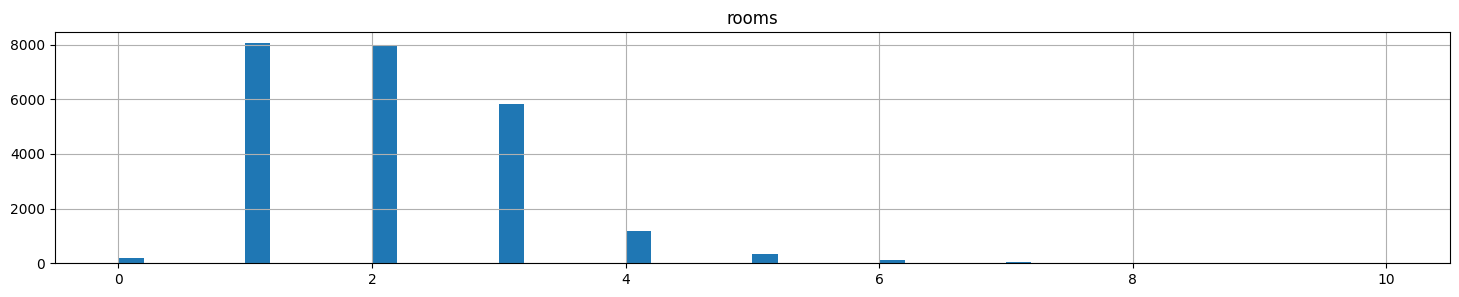

In [58]:
data.hist(column = 'rooms', bins = 50, figsize = (18,3), range = (0,10));


In [59]:
datax = data[(data['rooms'] >0) & (data['rooms'] <= 7) | (data['rooms'].isna()) ] 
datax.shape[0]

23471

In [60]:
filtration_percentage(data,datax)

По результатам фильтрации теряем 0.962%
Это допустимо!


In [61]:
data = datax.copy()

#### Аномалии в `total_area`

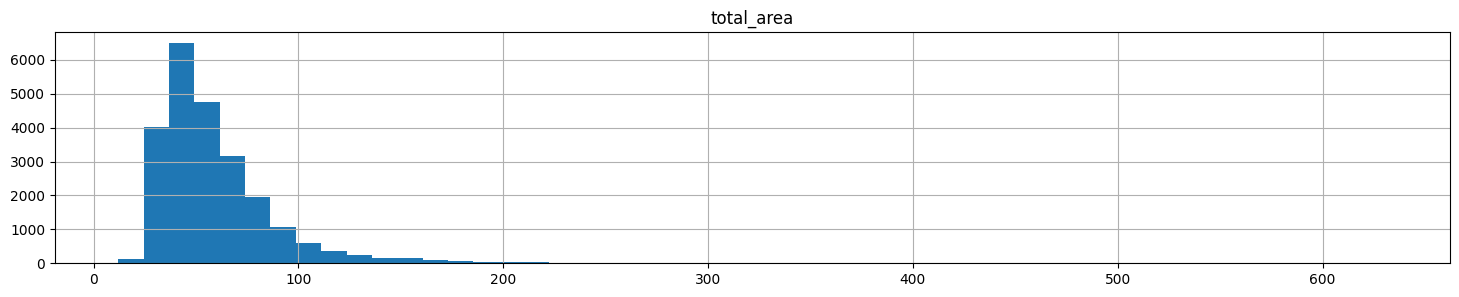

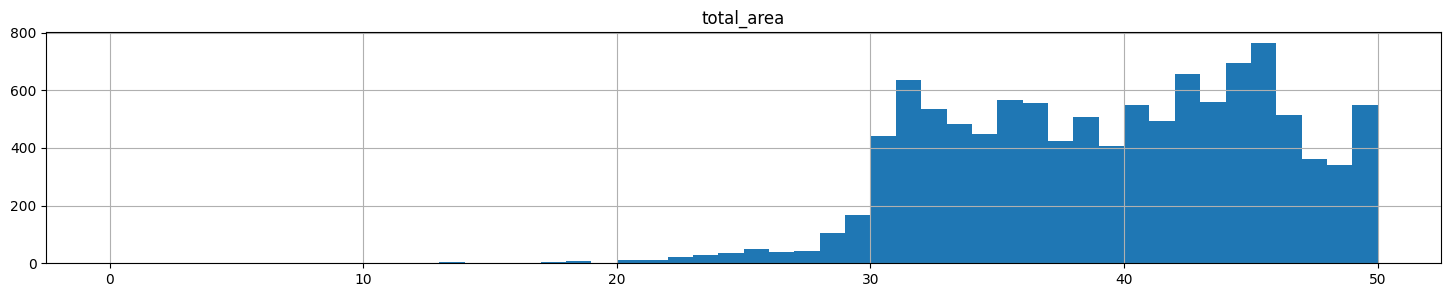

In [62]:
data.hist(column = 'total_area', bins = 50, figsize = (18,3));
data.hist(column = 'total_area', bins = 50, figsize = (18,3), range = (0, 50));

In [63]:
datax = data[(data['total_area'] >20) & (data['total_area'] <= 200) | (data['total_area'].isna()) ]
datax.shape[0]

23247

In [64]:
filtration_percentage(data,datax)

По результатам фильтрации теряем 0.954%
Это допустимо!


In [65]:
data = datax.copy()

#### Аномалии в `ceiling_height`

In [66]:
#посмотрим уникальные значения
data['ceiling_height'].unique()

array([  2.7  ,   2.63 ,   3.03 ,   2.6  ,   2.64 ,   2.5  ,   2.67 ,
         2.55 ,   2.56 ,   3.05 ,   2.75 ,   2.9  ,   2.56 ,   2.8  ,
         3.   ,   2.65 ,   3.2  ,   2.61 ,   3.25 ,   3.45 ,   2.77 ,
         2.85 ,   2.525,   2.57 ,   4.15 ,   3.3  ,   2.71 ,   4.   ,
         2.47 ,   2.73 ,   2.84 ,   3.1  ,   2.34 ,   3.4  ,   3.5  ,
         2.52 ,   3.06 ,   2.72 ,   2.54 ,   2.51 ,   2.78 ,  13.85 ,
         2.76 ,  25.   ,   2.58 ,   3.7  ,   2.87 ,   2.66 ,   2.59 ,
         2.   ,   2.45 ,   3.6  ,   3.9  ,   2.92 ,   3.11 ,   3.13 ,
         3.8  ,   3.15 ,   3.55 ,   3.62 ,   3.12 ,   2.53 ,   2.74 ,
         2.96 ,   2.46 ,   5.   ,   2.79 ,   2.95 ,   4.06 ,   2.94 ,
         3.54 ,   3.53 ,   2.83 ,   2.4  ,   3.38 ,   3.01 ,   3.65 ,
         3.18 ,   3.35 ,   2.3  ,   2.48 ,   2.515,   2.62 ,   3.57 ,
         2.82 ,   2.65 ,   3.98 ,   3.83 ,  27.   ,   3.52 ,   3.75 ,
         2.88 ,   3.67 ,   3.66 ,   4.19 ,   3.95 ,   3.24 ,   4.8  ,
         4.5  ,   4.

Как оказалось, один из факторов аномалии в ceiling_height - человеческий фактор: высота потолка никак не может быть выше 8 метров. Люди ошибались в запятой: 25; 24; 26; 27; 14; 20; 22,6;. 100 - не может быть, как и 10 метров, как и 1, вообще меньше 2 выглядит как ошибка - такие помещения не пригодны для жизни - лучше такие значения убрать из выборки.

In [67]:
#переносим запятые делением на 10
data.update(data[(data['ceiling_height'] >= 8) & (data['ceiling_height'] <= 99)]['ceiling_height']/10)
#удаляем явные выбросы
data.drop(index=data.query('ceiling_height < 2 or ceiling_height > 99').index,inplace=True)

In [68]:
#перепроверяем уникальные значения
data['ceiling_height'].unique()

array([2.7  , 2.63 , 3.03 , 2.6  , 2.64 , 2.5  , 2.67 , 2.55 , 2.56 ,
       3.05 , 2.75 , 2.9  , 2.56 , 2.8  , 3.   , 2.65 , 3.2  , 2.61 ,
       3.25 , 3.45 , 2.77 , 2.85 , 2.525, 2.57 , 4.15 , 3.3  , 2.71 ,
       4.   , 2.47 , 2.73 , 2.84 , 3.1  , 2.34 , 3.4  , 3.5  , 2.52 ,
       3.06 , 2.72 , 2.54 , 2.51 , 2.78 , 2.76 , 2.58 , 3.7  , 2.87 ,
       2.66 , 2.59 , 2.   , 2.45 , 3.6  , 3.9  , 2.92 , 3.11 , 3.13 ,
       3.8  , 3.15 , 3.55 , 3.62 , 3.12 , 2.53 , 2.74 , 2.96 , 2.46 ,
       5.   , 2.79 , 2.95 , 4.06 , 2.94 , 3.54 , 3.53 , 2.83 , 2.4  ,
       3.38 , 3.01 , 3.65 , 3.18 , 3.35 , 2.3  , 2.48 , 2.515, 2.62 ,
       3.57 , 2.82 , 2.65 , 3.98 , 3.83 , 3.52 , 3.75 , 2.88 , 3.67 ,
       3.66 , 4.19 , 3.95 , 3.24 , 4.8  , 4.5  , 4.2  , 3.36 , 3.08 ,
       3.68 , 3.07 , 3.37 , 3.09 , 3.16 , 3.26 , 3.34 , 2.81 , 3.44 ,
       2.97 , 2.725, 4.37 , 2.68 , 2.6  , 3.22 , 3.27 , 2.675, 4.1  ,
       2.93 , 3.46 , 3.47 , 3.33 , 3.63 , 3.14 , 2.625, 3.32 , 2.615,
       2.98 , 2.86 ,

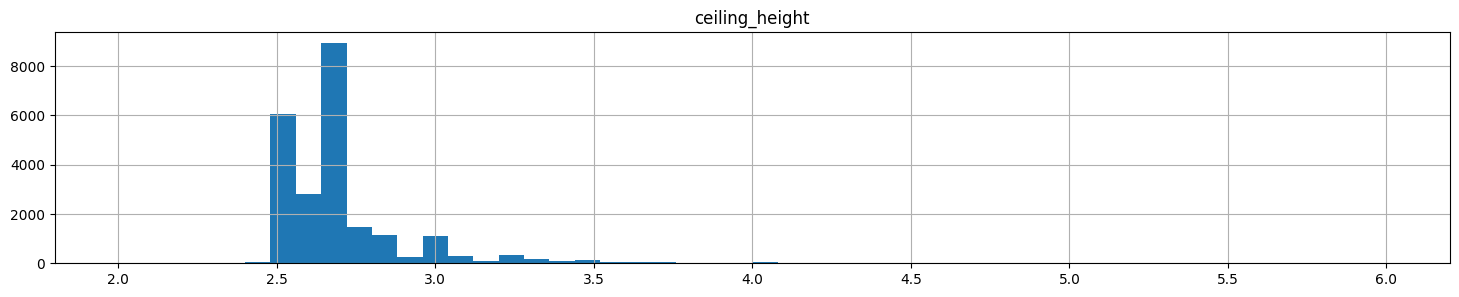

In [69]:
data.hist(column = 'ceiling_height', bins = 50, figsize = (18,3));

In [70]:
datax = data[(data['ceiling_height'] >2) & (data['ceiling_height'] <= 3.6) | (data['ceiling_height'].isna()) ]
datax.shape[0]

23049

In [71]:
filtration_percentage(data, datax)

По результатам фильтрации теряем 0.796%
Это допустимо!


In [72]:
data = datax.copy()

#### Аномалии в `days_exposition`

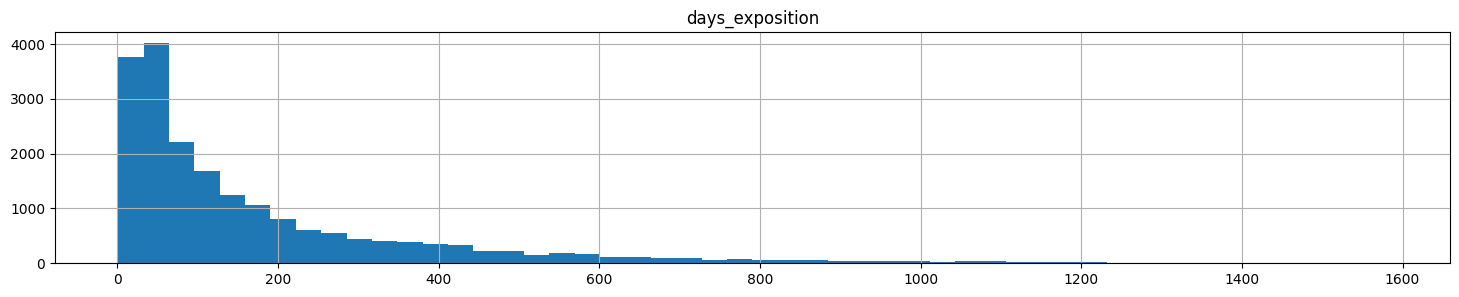

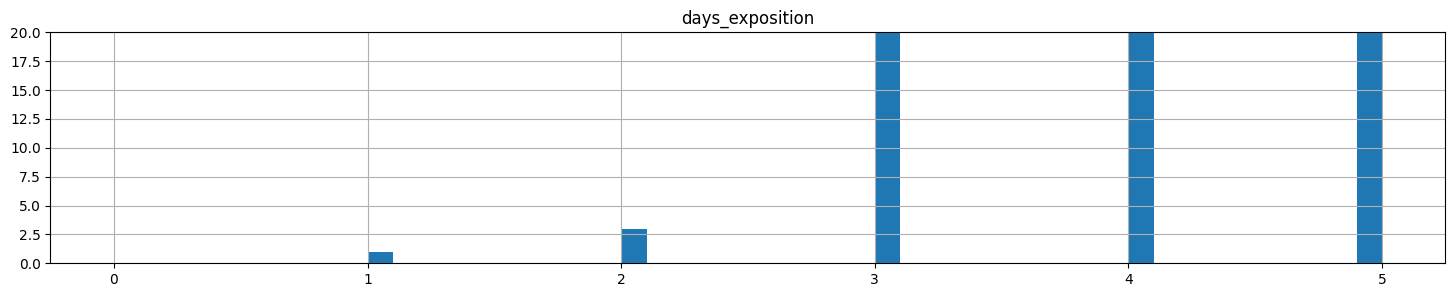

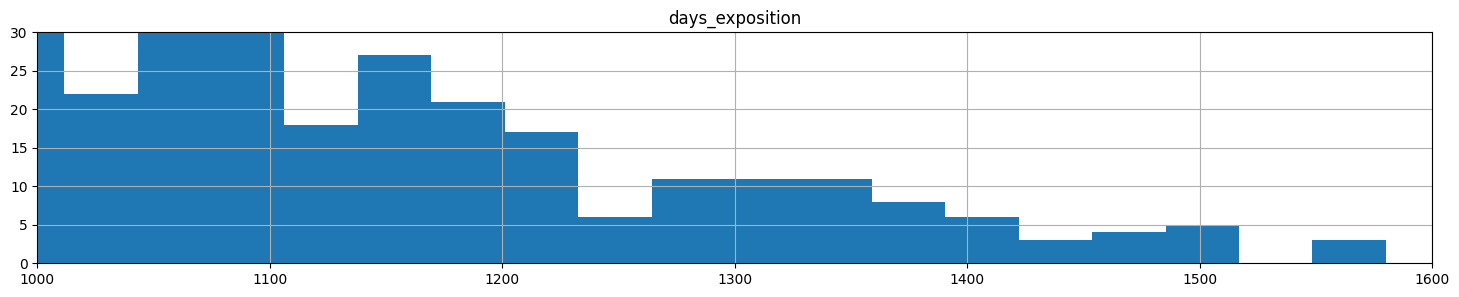

In [73]:
data.hist(column = 'days_exposition', bins = 50, figsize = (18,3))

data.hist(column = 'days_exposition', bins = 50, figsize = (18,3), range = (0,5))
plt.ylim(0, 20);

data.hist(column = 'days_exposition', bins = 50, figsize = (18,3))
plt.ylim(0, 30)
plt.xlim(1000, 1600);

In [74]:
datax = data[(data['days_exposition'] >2) & (data['days_exposition'] <= 1050) | (data['days_exposition'].isna()) ]

In [75]:
filtration_percentage(data, datax)

По результатам фильтрации теряем 0.941%
Это допустимо!


In [76]:
data = datax.copy()

#### Аномалии в `last_price`

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

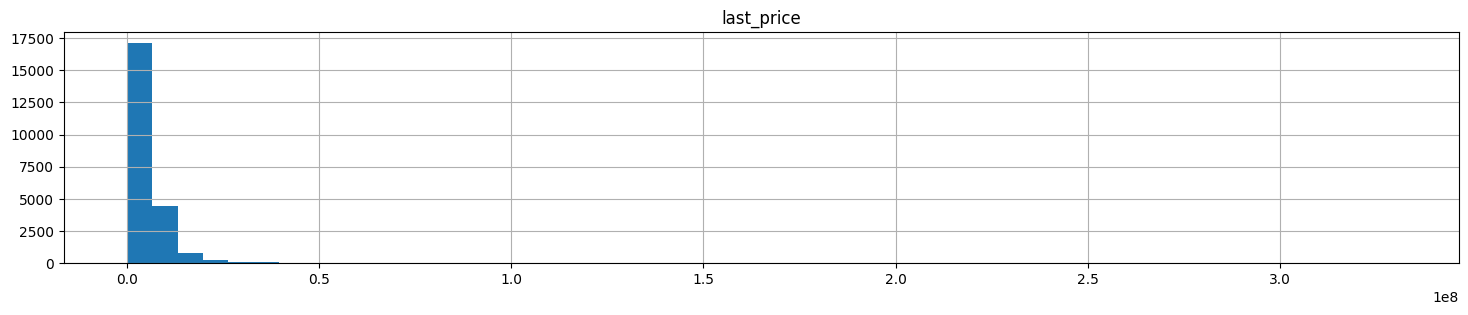

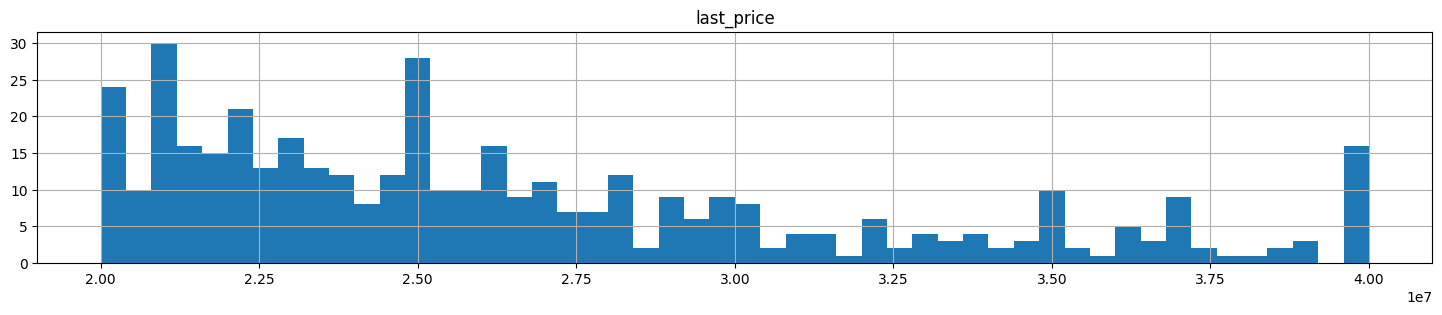

In [77]:
data.hist(column = 'last_price', bins = 50, figsize = (18,3));
data.hist(column = 'last_price', bins = 50, figsize = (18,3), range = (20000000,40000000))

In [78]:
datax = data[(data['last_price'] >0) & (data['last_price'] <= 24000000) | (data['last_price'].isna()) ]

In [79]:
filtration_percentage(data, datax)

По результатам фильтрации теряем 1.44%
Поменяйте условия фильтрации!


In [80]:
data = datax.copy()

#### Аномалии в `living_area`

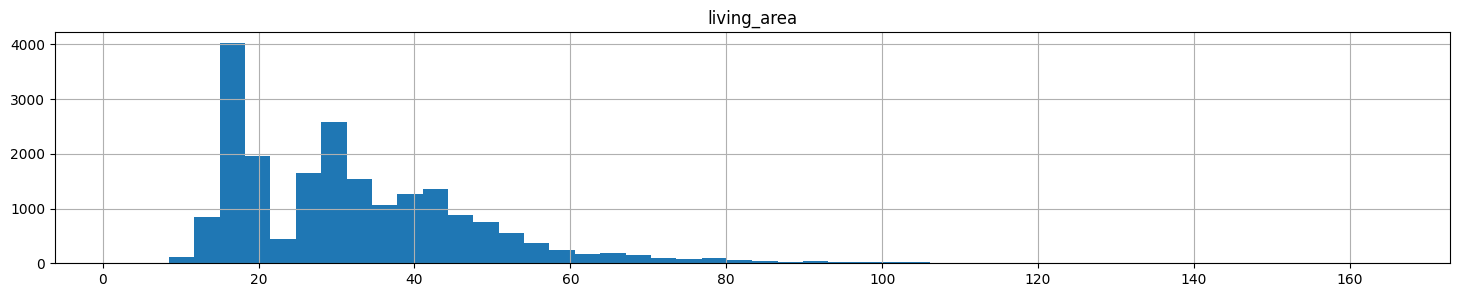

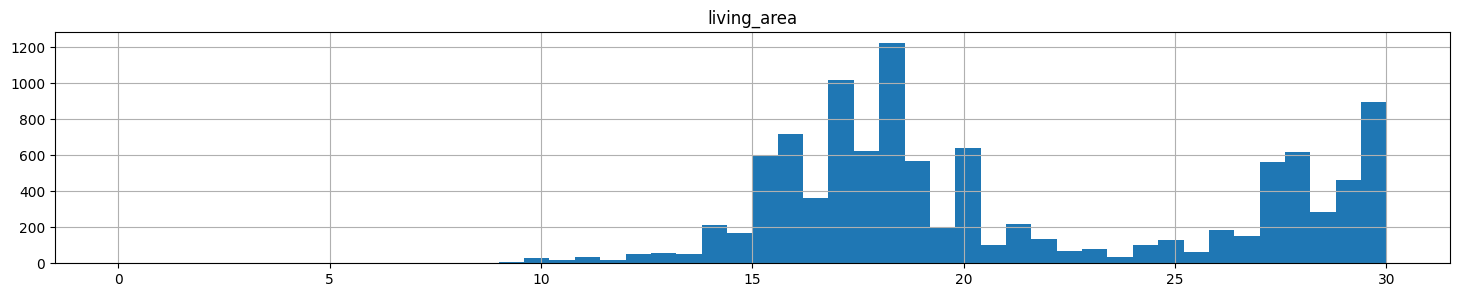

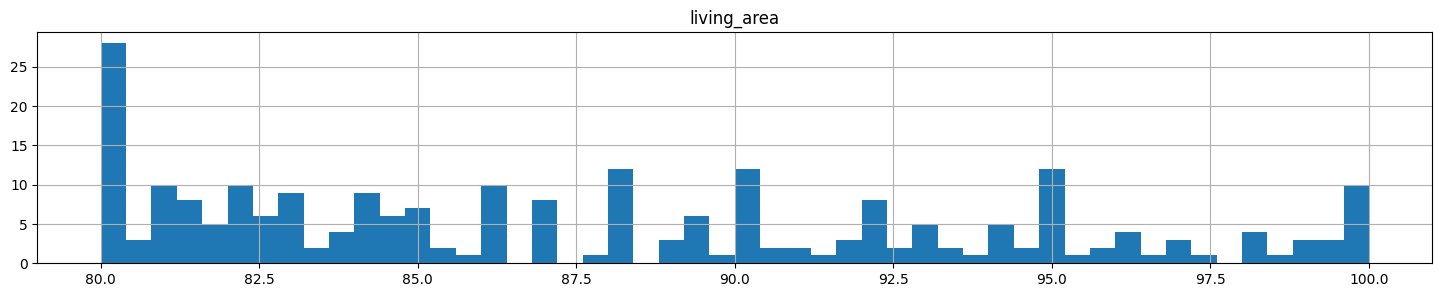

In [81]:
data.hist(column = 'living_area', bins = 50, figsize = (18,3));
data.hist(column = 'living_area', bins = 50, figsize = (18,3), range = (0,30));
data.hist(column = 'living_area', bins = 50, figsize = (18,3), range = (80,100));

In [82]:
datax = data[(data['living_area'] >10) & (data['living_area'] <= 94) | (data['living_area'].isna()) ]

In [83]:
filtration_percentage(data, datax)

По результатам фильтрации теряем 0.92%
Это допустимо!


In [84]:
data = datax.copy()

#### Аномалии в `kitchen_area`

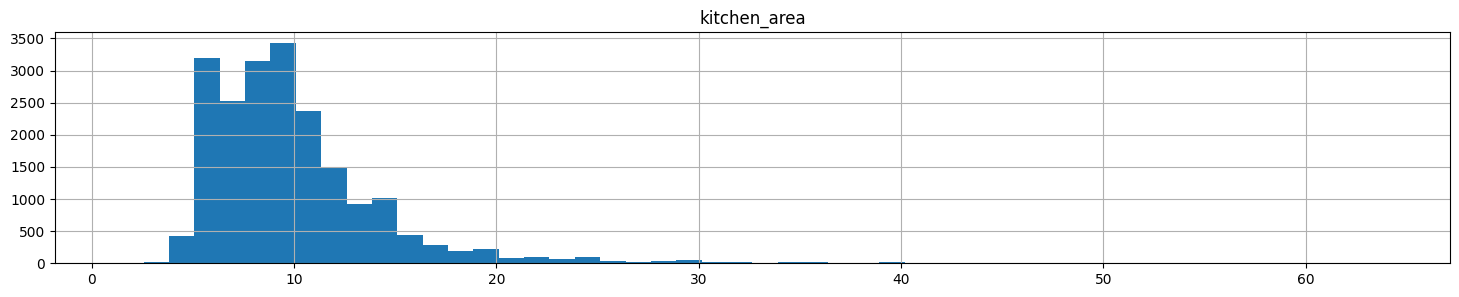

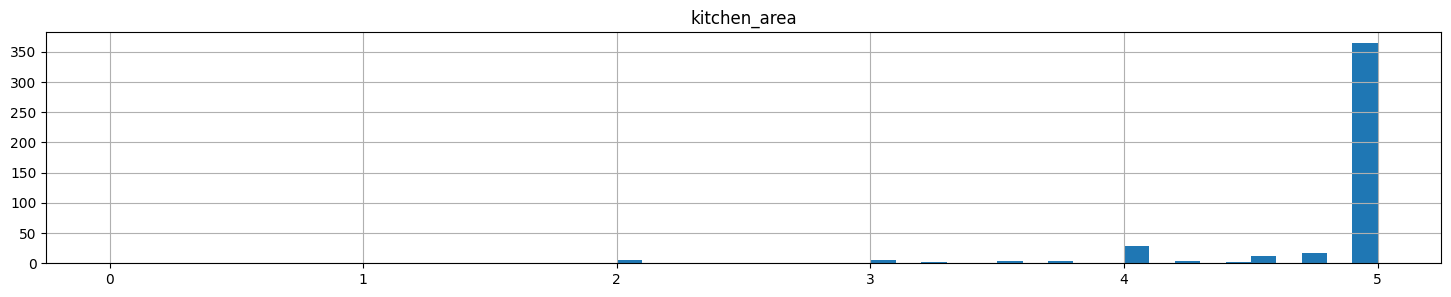

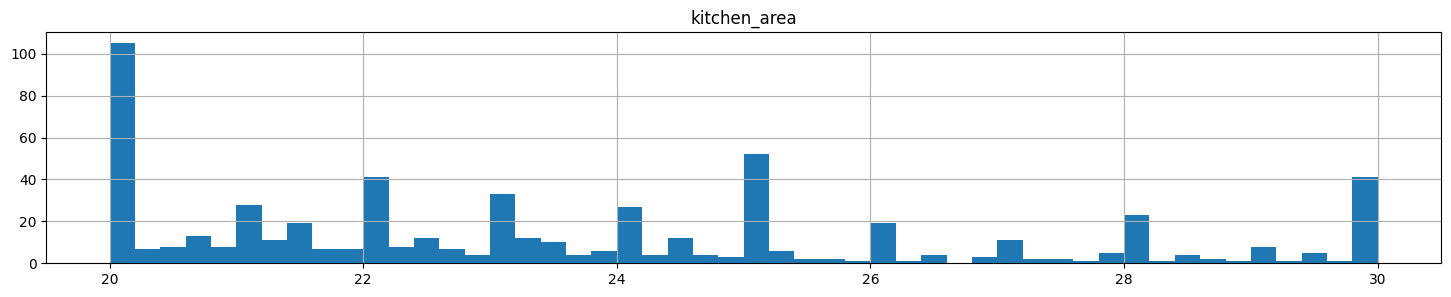

In [85]:
data.hist(column = 'kitchen_area', bins = 50, figsize = (18,3));
data.hist(column = 'kitchen_area', bins = 50, figsize = (18,3), range = (0, 5));
data.hist(column = 'kitchen_area', bins = 50, figsize = (18,3), range = (20, 30));

In [86]:
datax = data[(data['kitchen_area'] >3) & (data['kitchen_area'] <= 30) | (data['kitchen_area'].isna()) ]

In [87]:
filtration_percentage(data, datax)

По результатам фильтрации теряем 0.803%
Это допустимо!


In [88]:
data = datax.copy()

#### Аномалии в `floor`

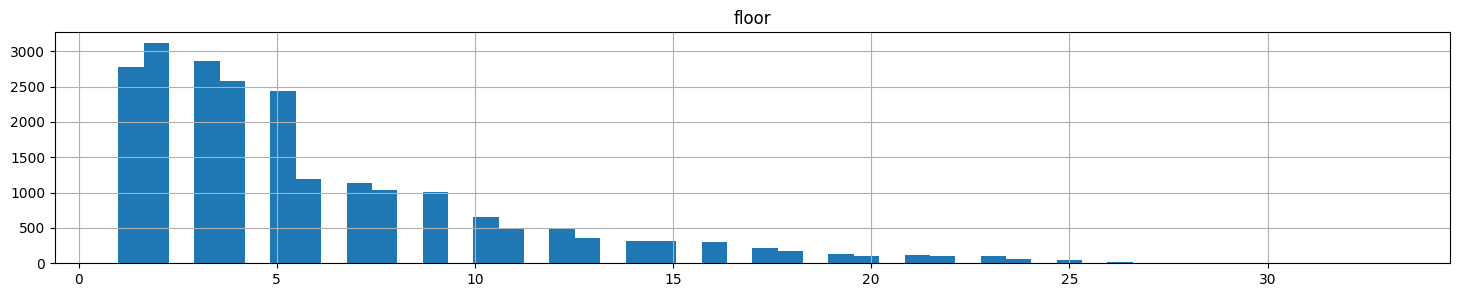

In [89]:
data.hist(column = 'floor', bins = 50, figsize = (18,3));

In [90]:
datax = data[(data['floor'] >0) & (data['floor'] <= 23) | (data['floor'].isna()) ]

In [91]:
filtration_percentage(data, datax)

По результатам фильтрации теряем 0.615%
Это допустимо!


In [92]:
data = datax.copy()

#### Аномалии в `floors_total`

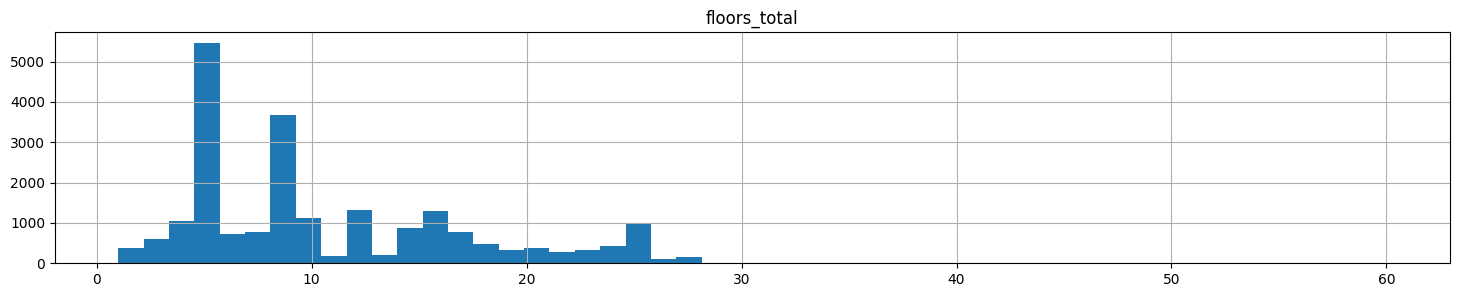

In [93]:
data.hist(column = 'floors_total', bins = 50, figsize = (18,3));

In [94]:
datax = data[(data['floors_total'] >0) & (data['floors_total'] <= 26) | (data['floors_total'].isna()) ]

In [95]:
filtration_percentage(data, datax)

По результатам фильтрации теряем 0.751%
Это допустимо!


In [96]:
data = datax.copy()

По мере нахождения аномалий они были исправлены с учетом, что % потери данных не должен превышать 1%. И по итогу все потери при обработке аномалий не должны превышать 10%. Убедимся в этом

#### Вывод

In [97]:
((original_shape - data.shape[0]) / original_shape)*100

7.945482931769273

### Вывод

В ходе предобработки данных было сделано:
- исправлены наименования
- были выявлены и обработаны пропуски в таблице в пределах разумного
- изменены некорректые типы данных
- были выявлены и обработаны дубликаты
- по "ящикам с усами" были выявлены аномалии
- каждая колонка с аномалиями была исследована и отфильтрована в допустимых рамках

In [98]:
# check
 
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

## Расчет и добавление в таблицу новых столбцов

### Цена одного квадратного метра

In [99]:
data['cost_per_sqm'] = data['last_price'] / data['total_area']

### День, месяц, год публикации

In [100]:
data['weekday']=pd.DatetimeIndex(data['first_day_exposition']).weekday

In [101]:
data['month']=pd.DatetimeIndex(data['first_day_exposition']).month

In [102]:
data['year']=pd.DatetimeIndex(data['first_day_exposition']).year

### Тип этажа квартиры

In [103]:
def get_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif floor == 0:
        return 'нулевой'
    elif floor < 0:
        return 'подземный'
    else:
        return 'другой'

In [104]:
data['floor_category'] = data.apply(get_floor_category, axis=1)

In [105]:
data['floor_category'].describe().T

count      21816
unique         3
top       другой
freq       16050
Name: floor_category, dtype: object

### Расстояние в км до центра города

In [106]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

### Проверка

In [107]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
5            10   2890000.0        30.4           2018-09-10      1   
6             6   3700000.0        37.3           2017-11-02      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0      8         False  ...   
1            2.63          11.0         18.6      1         False  ...   
2            2.70           5.0         34.3      4         False  ...   
5            2.60          12.0         14.4      5         False  ...   
6            2.64          26.0         10.6      6         False  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0                 2          755.0              NaN   
1          209.0                 0          243.5             81.0   
2           90.0                 2          574.0            558.0   
5            0.0                 0            0.0             55.0   
6          209.0                 0          243.5            155.0   

    cost_per_sqm  weekday  month  year  floor_category  \
0  120370.370370        3      3  2019          другой   
1   82920.792079        1     12  2018          первый   
2   92785.714286        3      8  2015          другой   
5   95065.789474        0      9  2018          другой   
6   99195.710456        3     11  2017          другой   

   city_centers_nearest_km  
0                     16.0  
1                     19.0  
2                     14.0  
5                     13.0  
6                     19.0  

[5 rows x 28 columns]

## Исследовательский анализ данных

### Анализ основных параметров

Проанализируем основные параметры датафрейма:
- `total_area`  - общая площадь;
- `living_area`  - жилая площадь;
- `kitchen_area`  - площадь кухни;
- `last_price`  - цена объекта;
- `rooms`  - количество комнат;
- `ceiling_height`  - высота потолков;
- `floor_category`  - тип этажа квартиры («первый», «последний», «другой»);
- `floors_total`  - общее количество этажей в доме;
- `city_centers_nearest`  - расстояние до центра города в метрах;
- `parks_nearest`  - расстояние до ближайшего парка;

In [108]:
(
    data[['total_area',
    'living_area',
    'kitchen_area',
    'last_price',
    'rooms',
    'ceiling_height',
    'floor_category',
    'floors_total',
    'city_centers_nearest',
    'parks_nearest']].describe()
)

total_area   living_area  kitchen_area    last_price         rooms  \
count  21816.000000  20072.000000  19883.000000  2.181600e+04  21816.000000   
mean      55.911255     32.001792      9.819480  5.372396e+06      2.006463   
std       21.869652     14.611617      3.897557  3.226883e+06      0.925065   
min       20.100000     10.080000      3.200000  4.300000e+05      1.000000   
25%       40.000000     18.600000      7.000000  3.400000e+06      1.000000   
50%       51.000000     30.000000      9.000000  4.540000e+06      2.000000   
75%       66.600000     41.000000     11.300000  6.400000e+06      3.000000   
max      200.000000     94.000000     30.000000  2.400000e+07      7.000000   

       ceiling_height  floors_total  city_centers_nearest  parks_nearest  
count    21816.000000  21741.000000          21816.000000   21816.000000  
mean         2.681503     10.523711          14280.229602     252.735699  
std          0.174403      6.343535           7528.741534     271.042051  
min          2.200000      1.000000            287.000000       0.000000  
25%          2.550000      5.000000          11367.000000      57.000000  
50%          2.700000      9.000000          13101.000000     209.000000  
75%          2.700000     15.000000          15426.250000     287.000000  
max          3.600000     26.000000          65952.000000    3190.000000

#### Анализ общей площади - `total_area`

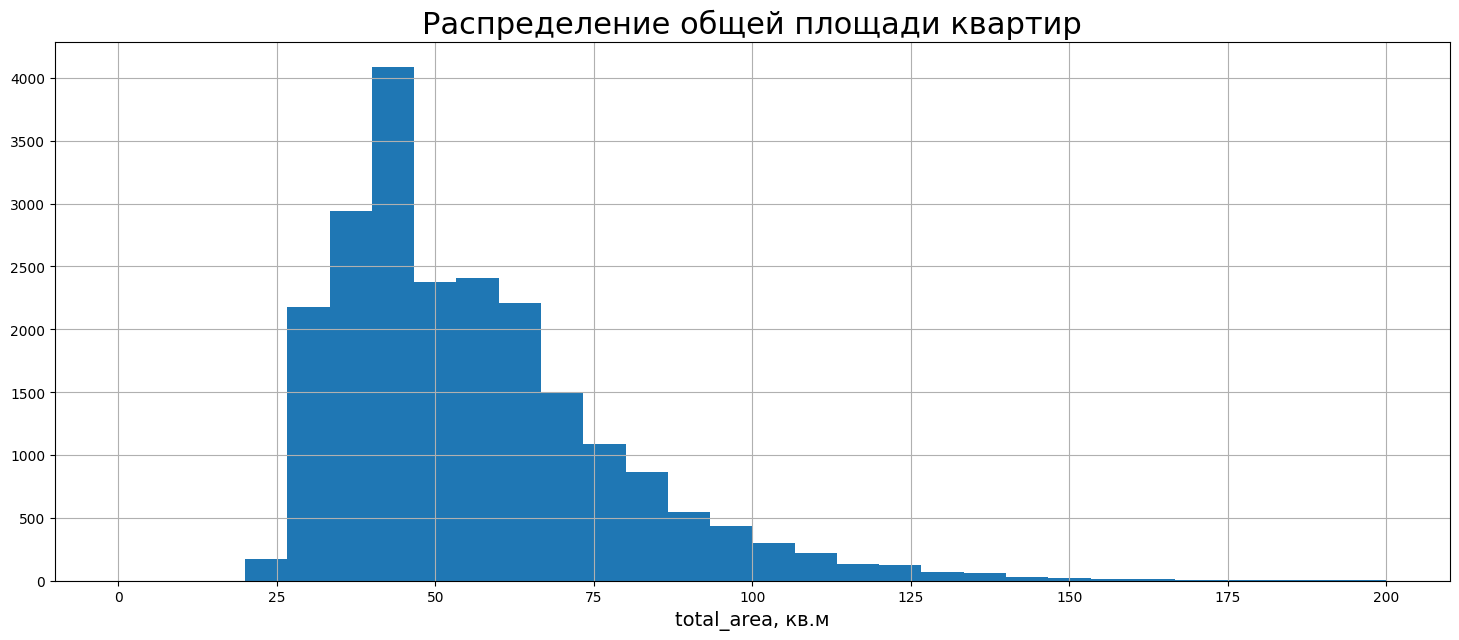

In [109]:
data.hist(['total_area'],figsize=(18,7), bins=30, range=(0,200))
plt.title('Распределение общей площади квартир', size = 22)
plt.xlabel('total_area, кв.м', size=14)
plt.show()

Больше 50% объявлений описывают квартиры площадью до 60 кв. м.

#### Анализ жилой площади - `living_area`

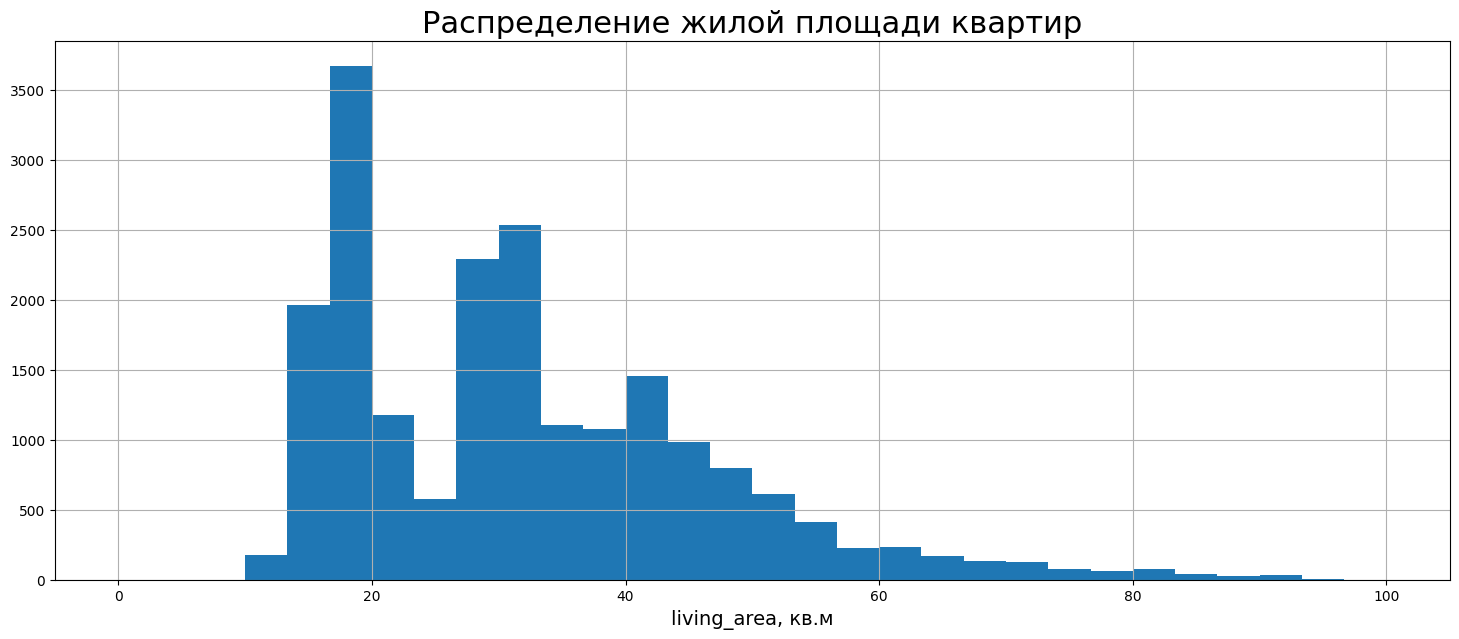

In [110]:
data.hist(['living_area'],figsize=(18,7), bins=30, range=(0,100))
plt.title('Распределение жилой площади квартир', size = 22)
plt.xlabel('living_area, кв.м', size=14)
plt.show()

У большинства объявлений жилая площадь составляет до 40 кв.м.  
Также есть провал при 20-25 кв.м. - выглядит скорее как недостаток данных

#### Анализ площадей кухонь - `kitchen_area`

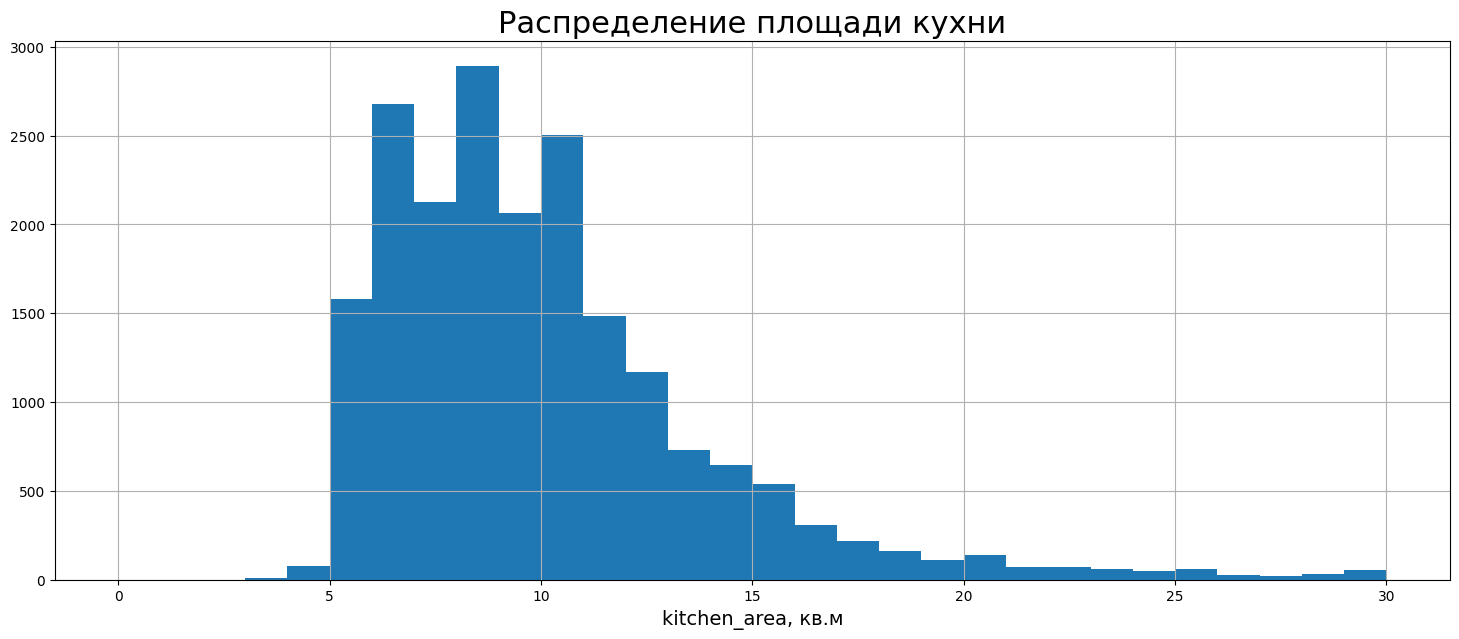

In [111]:
data.hist(['kitchen_area'],figsize=(18,7), bins=30, range=(0,30))
plt.title('Распределение площади кухни', size = 22)
plt.xlabel('kitchen_area, кв.м', size=14)
plt.show()

Площадь кухни у большинства объявлений находится в пределах 11 кв.м.

#### Корреляция общей площади и жилой площади и площади кухни

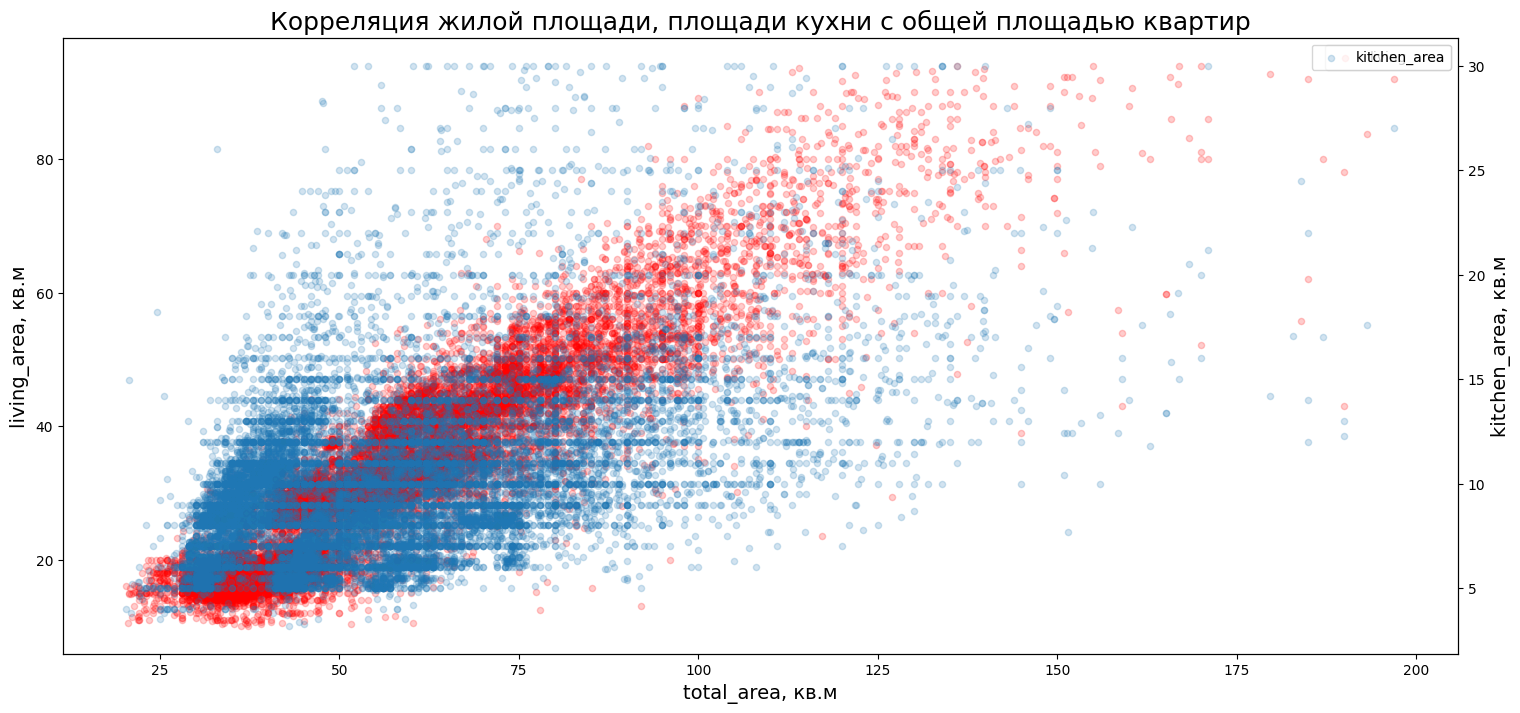

In [112]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
data.plot(x='total_area', y='living_area', kind='scatter', alpha=0.2, figsize=(18,8),ax=ax, color='r', label= 'living_area')
data.plot(x='total_area', y='kitchen_area', kind='scatter', alpha=0.2, figsize=(18,8),ax=ax1, label= 'kitchen_area')
ax.set_ylabel('living_area, кв.м', size=14)
ax1.set_ylabel('kitchen_area, кв.м', size=14)
ax.set_xlabel('total_area, кв.м', size=14)
plt.title('Корреляция жилой площади, площади кухни с общей площадью квартир', size = 18)
plt.show()


По площадям помещений, можно сказать, что большинство квартир соответствует стандартной картине на рынке недвижимости. А также площади помещений коррелируют друг с другом, чем больше, в целом, площадь квартиры, тем больше жилая площадь и площадь кухни.

#### Анализ стоимости квартир - `last_price`

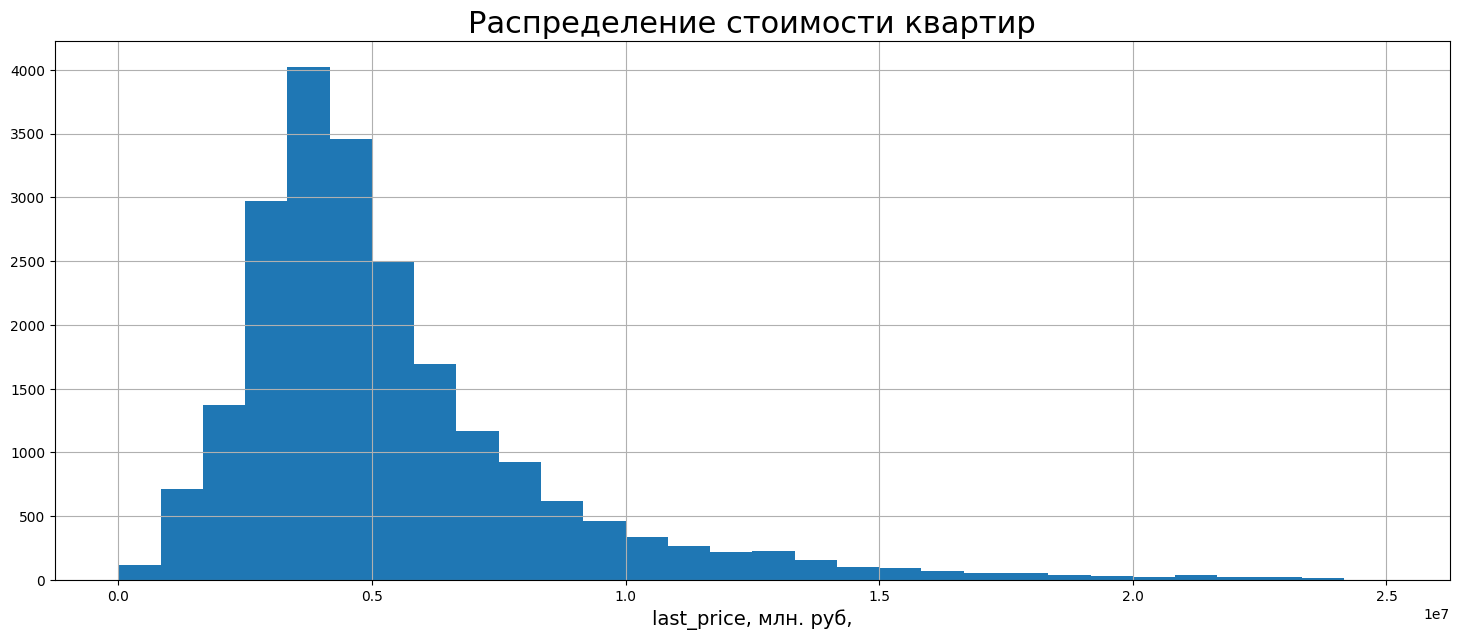

In [113]:
data.hist(['last_price'],figsize=(18,7), bins=30, range=(0,25000000))
plt.title('Распределение стоимости квартир', size = 22)
plt.xlabel('last_price, млн. руб,', size=14)
plt.show()

Больше всего в СПб и ЛО квартир стоимостью до 5 млн рублей. Звучит как сказка!

#### Анализ количества комнат - `rooms`

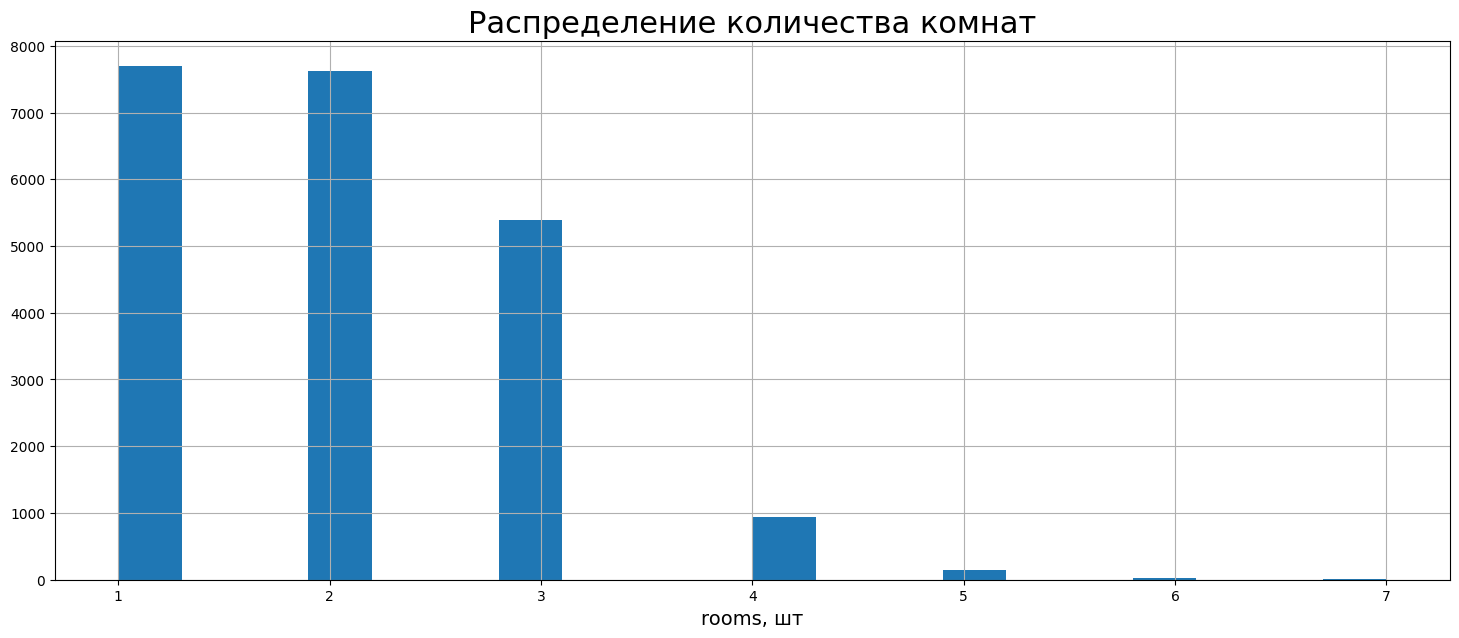

In [114]:
data.hist(['rooms'],figsize=(18,7), bins=20)
plt.title('Распределение количества комнат', size = 22)
plt.xlabel('rooms, шт', size=14)
plt.show()

Наиболее популярны в продаже однокомнатные и двухкомнатные, а затем трехкомнатные. Данные позиции составляют большинство от объявлений.

#### Анализ высоты потолков квартир - `ceiling_height`

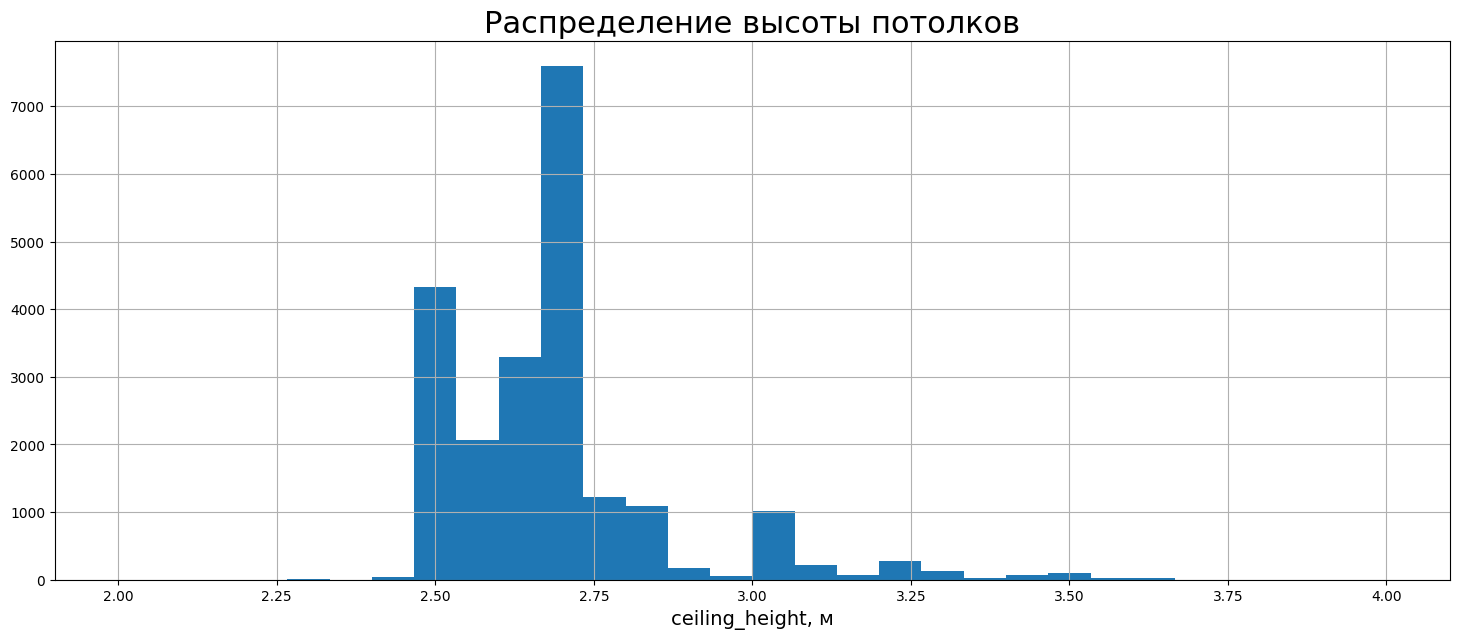

In [115]:
data.hist(['ceiling_height'],figsize=(18,7), bins=30, range=(2,4))
plt.title('Распределение высоты потолков', size = 22)
plt.xlabel('ceiling_height, м', size=14)
plt.show()

Большая часть квартир имеет высоту от 2.5 до 2.65 м включительно. Даже с учетом заполнения пустых значений медианным - 2.7. В целом похоже на правду, так как в центре Санкт-Петербурга достаточно много зданий с высокими потолками.

#### Анализ категории этажности домов - `floor_category`

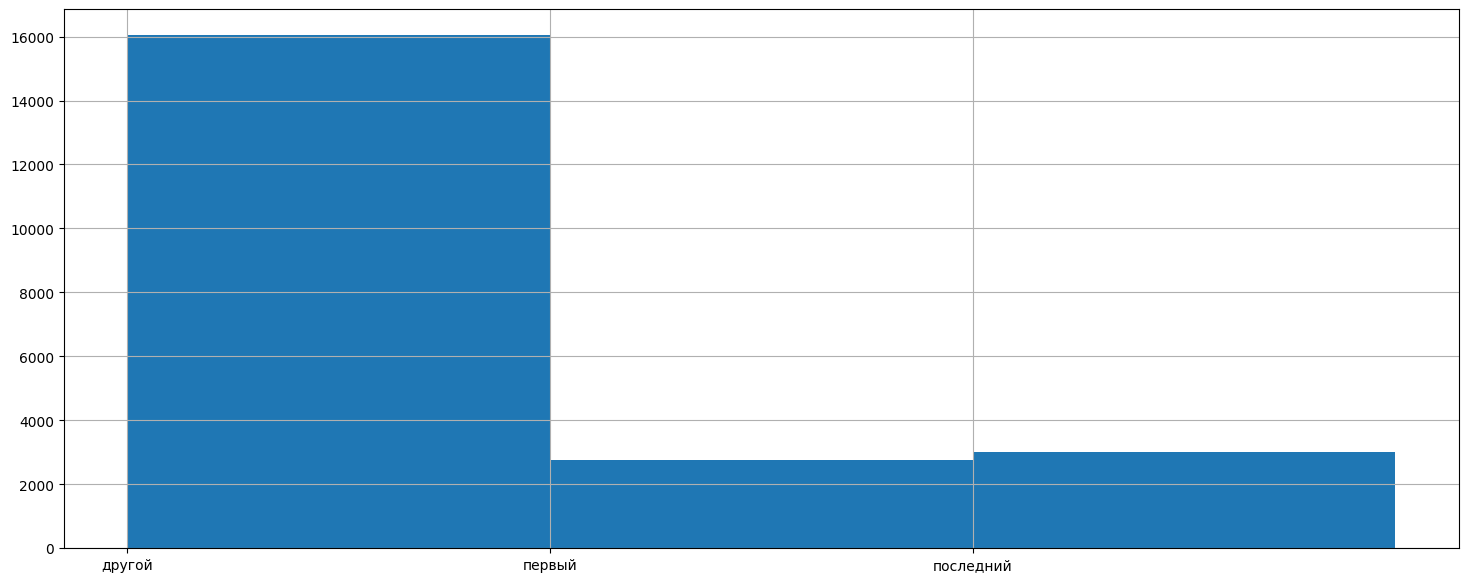

In [116]:
data['floor_category'].hist(bins=3,range=(0,3),figsize=(18,7));

Квартир на первых и последних этажах примерно одинаково, но не составляют и 50% выборки. Большинство квартир находятся не на 1 и последнем этажах.

#### Анализ многоэтажности домов - `floors_total`

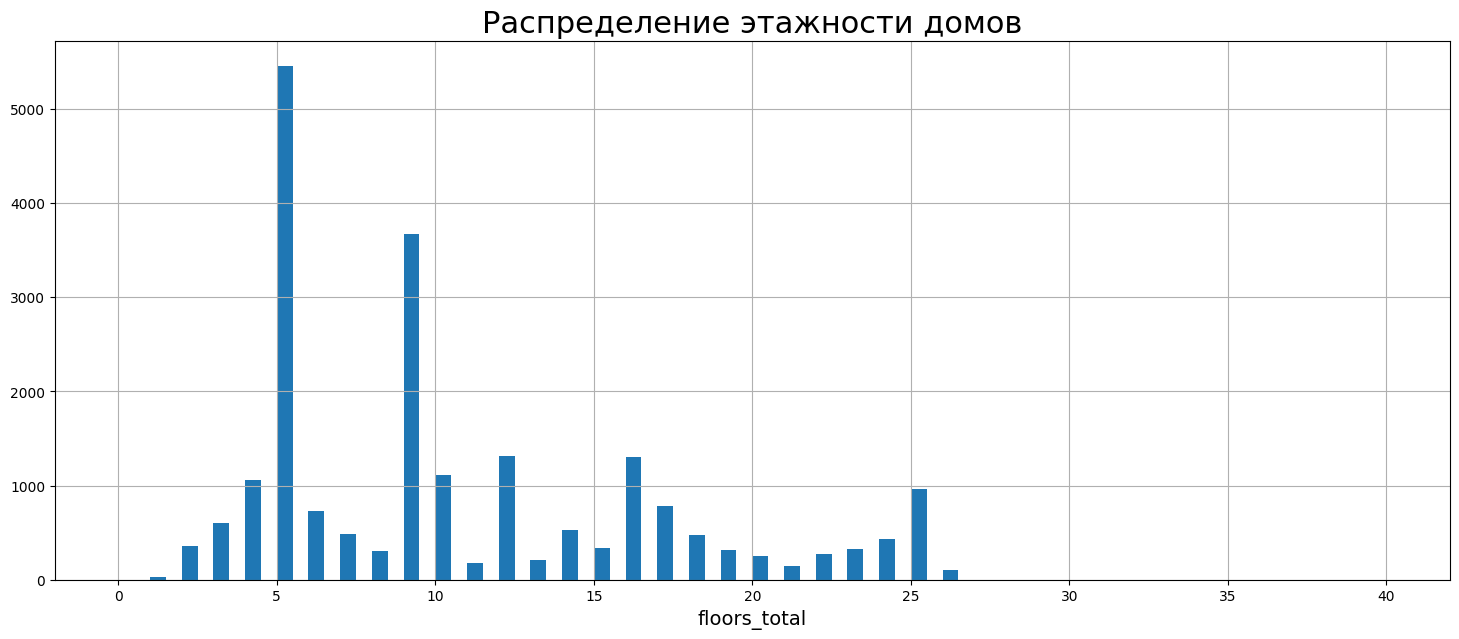

In [117]:
data.hist(['floors_total'],figsize=(18,7), bins=80, range=(0,40))
plt.title('Распределение этажности домов', size = 22)
plt.xlabel('floors_total', size=14)
plt.show()

Больше 50% объявлений расположено в домах, где не больше 15 этажей. В СПб, в целом, ввиду исторических особенностей, больше домов низкой постройки. Высотки строятся ближе к окраине. А здание в 36 этажей (самое высокое) и вовсе одно. В 35 тоже редкость. При этом более встречаемое значение - 4-5 этажей. Соответствует реальному положению дел.

#### Анализ расстояния от центра города - `city_centers_nearest`

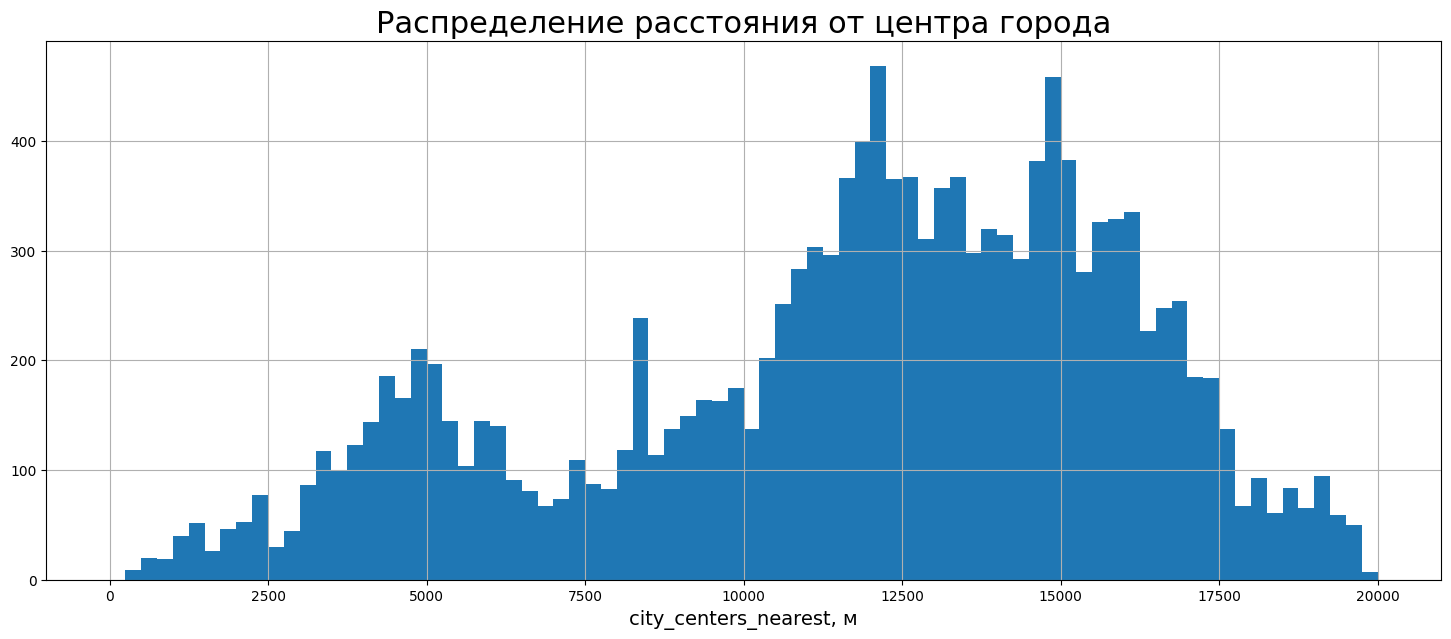

In [118]:
# уберем значения, которые мы заполнили медианой, чтобы увидеть картину корректнее
data_clean = data[data['city_centers_nearest']!= data['city_centers_nearest'].median()]

data_clean.hist(['city_centers_nearest'],figsize=(18,7), bins=80, range=(0,20000))
plt.title('Распределение расстояния от центра города', size = 22)
plt.xlabel('city_centers_nearest, м', size=14)
plt.show()

Большая часть недвижимости расположена в пределах от 10 до 17 км от центра. Это объясняет то, что большая часть квартир находится в относительно малоэтажных зданиях. Чем дальше от центра, тем выше этажность домов. Из них, большая часть приходится на расстояние в 13 км от центра. Это золотая середина в СПб - районы Московский, Красногвардейский и т.д. Не очень далеко, но и не близко.

#### Анализ расстояния до парковой зоны - `parks_nearest`

12418


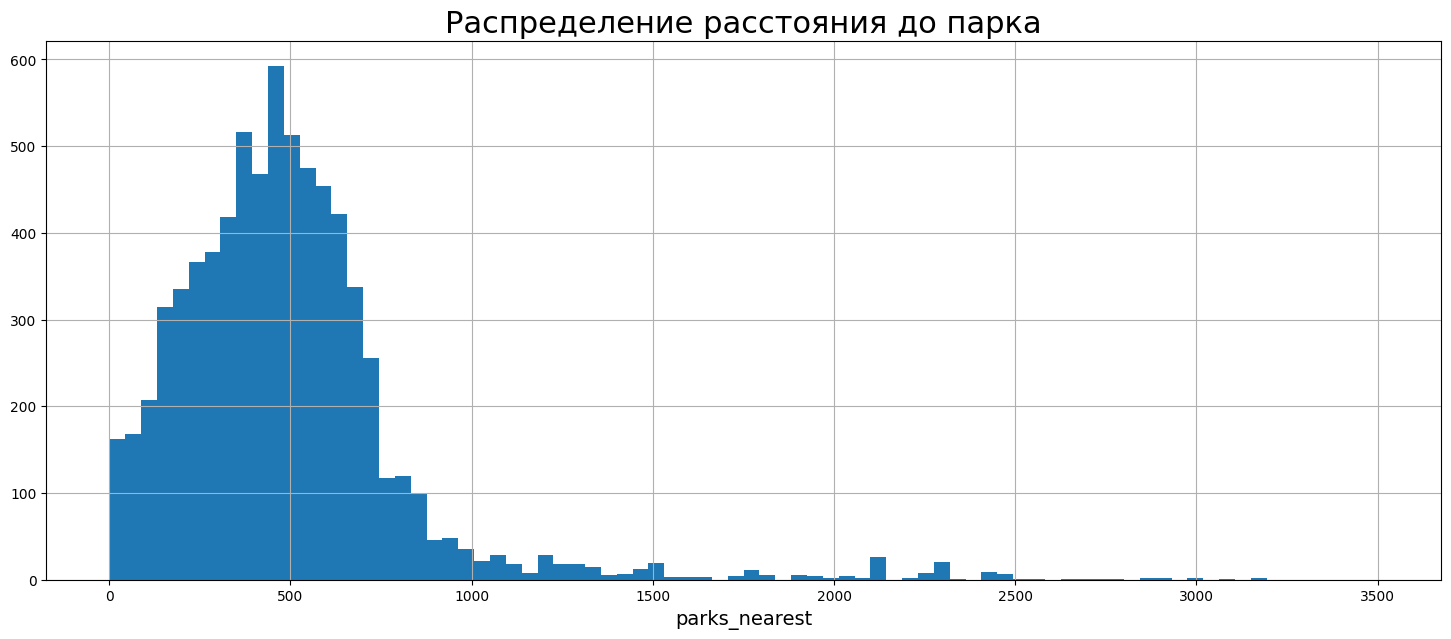

In [119]:
# уберем значения, которые мы заполнили медианой, чтобы увидеть картину корректнее
data_clean = data[data['parks_nearest']!= data['parks_nearest'].median()]
print(data_clean.shape[0])

data_clean.hist(['parks_nearest'],figsize=(18,7), bins=80, range=(1,3500)) #уберем нулевые значения, для понятной картины
plt.title('Распределение расстояния до парка', size = 22)
plt.xlabel('parks_nearest', size=14)
plt.show()

В СПб и ЛО очень много парковых зон. Поэтому неудивительно, что большая часть квартир имеет недалеко парковую зону. Однако пропусков в данных было около 65%, так что данная гистограмма скорее показывает тенденцию, нежели реальную картину.

### Как быстро продавались квартиры?

Изучим, как быстро продавались квартиры. Для этого построим гистограмму по параметру `days_exposition`, а также посчитаем среднее и медиану и сделаем необходимые выводы.

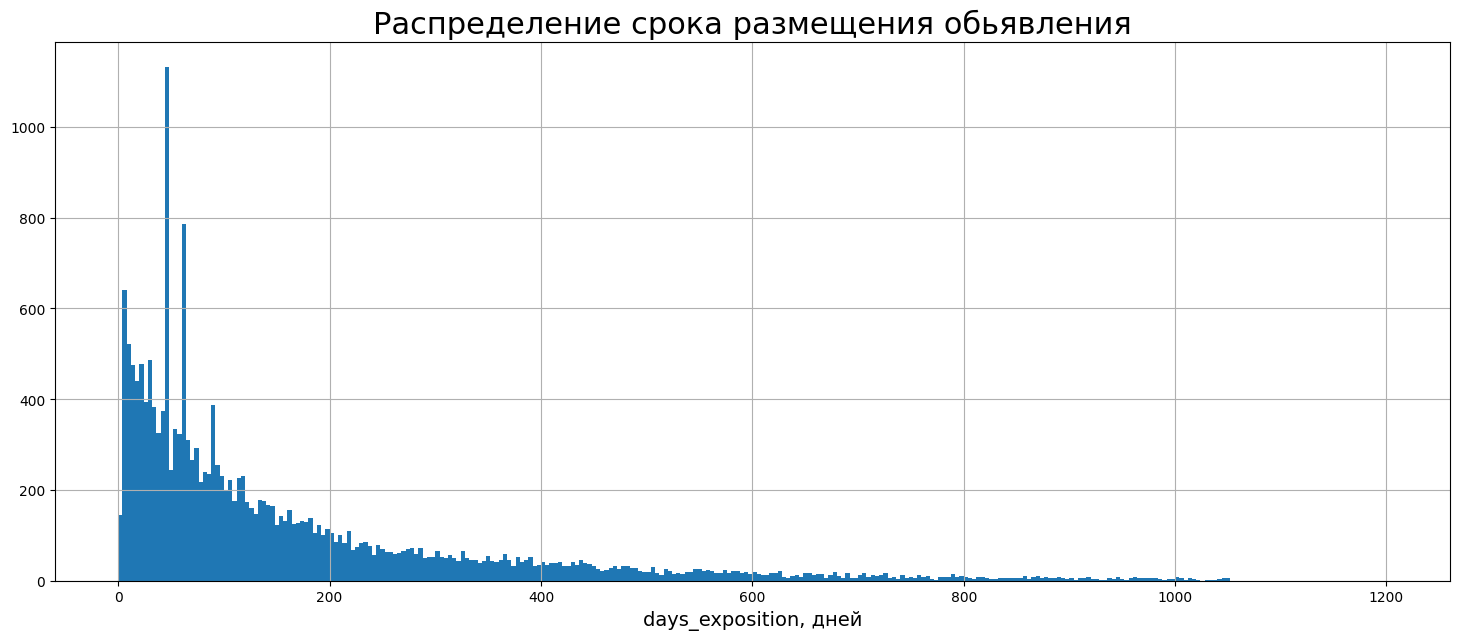

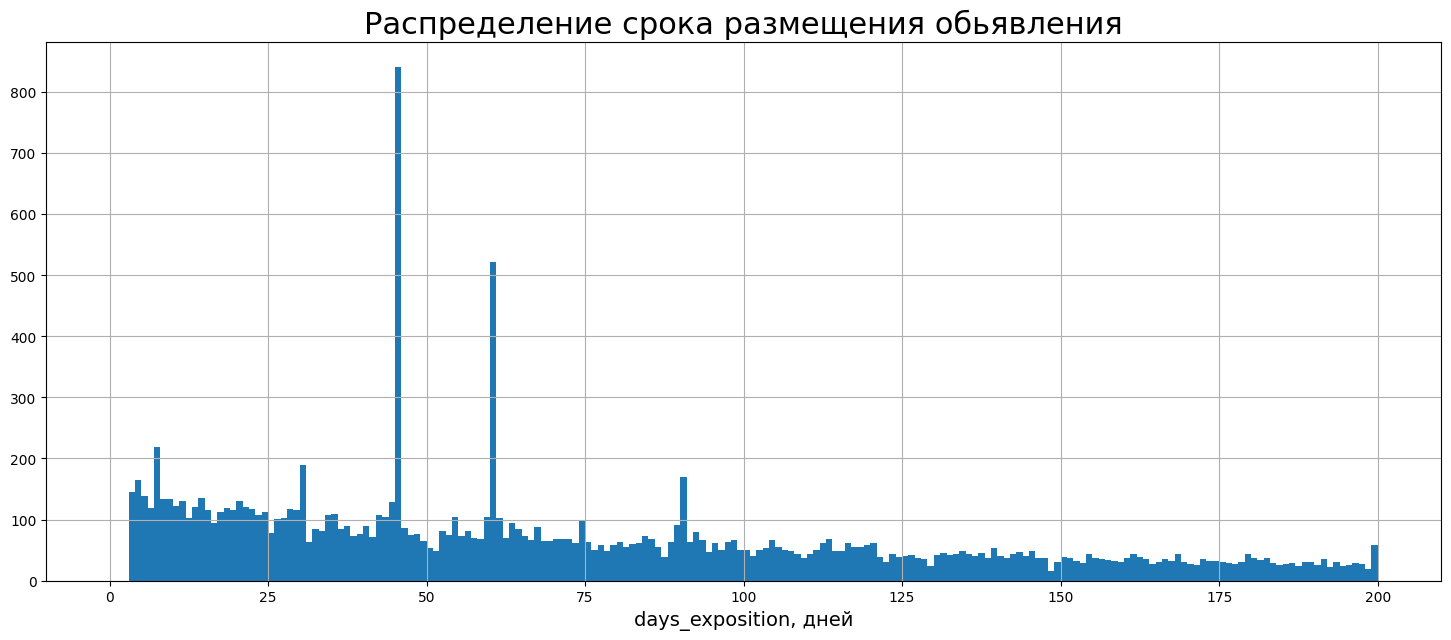

In [120]:
data.hist(['days_exposition'],figsize=(18,7), bins=300, range=(0,1200)) 
plt.title('Распределение срока размещения обьявления', size = 22)
plt.xlabel('days_exposition, дней', size=14)
plt.show()
data.hist(['days_exposition'],figsize=(18,7), bins=200, range=(0,200)) 
plt.title('Распределение срока размещения обьявления', size = 22)
plt.xlabel('days_exposition, дней', size=14)
plt.show()

In [121]:
data['days_exposition'].describe()

count    18965.000000
mean       166.909148
std        189.768511
min          3.000000
25%         44.000000
50%         92.000000
75%        218.000000
max       1050.000000
Name: days_exposition, dtype: float64

Обычно продажа занимает 92 дня. Но среднее показывает, что есть ситуации, когда продажа квартиры занимает намного больше. Это видно и из гистограммы. Среднее значение не устойчиво к выбросам, а выбросы здесь есть. Исходя из полученных значений, можно сказать, что продажа длиною больше 200 дней уже будет необычайно долгой, а продажа меньше, чем за месяц - быстрой.

Посмотрим как распределялась средний срок размещения обьявления по годам

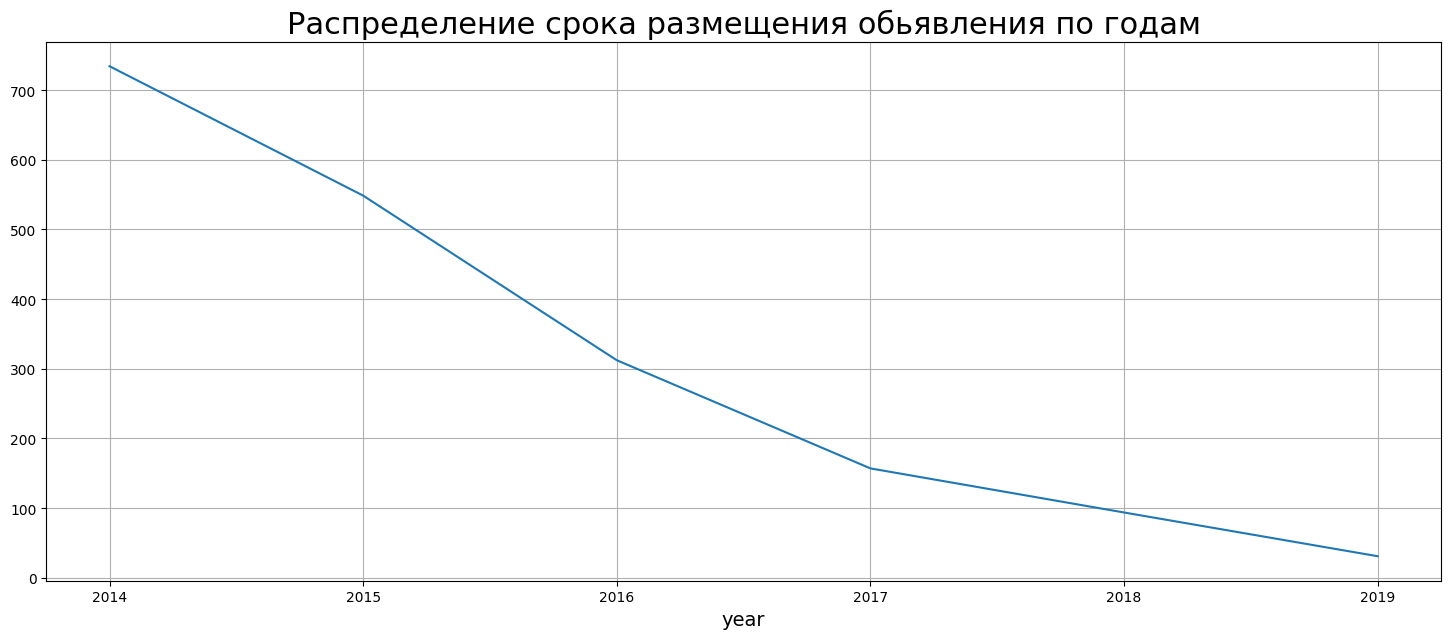

In [122]:
data.groupby('year')['days_exposition'].mean().plot(figsize=(18,7), grid=True)
plt.title('Распределение срока размещения обьявления по годам', size = 22)
plt.xlabel('year', size=14)
plt.show()

Длительность размещения обьявления по годам с каждым годом падает - другими словами скорость продажи растет с каждым годом. Звучит довольно логично, учитывая вечный рост спроса на квартиры, рост и скорость застройки, и прогресс в сфере рекламы и маркетинга.

### Факторы, которые больше всего влияют на общую (полную) стоимость объекта

Проанализируем, какие факторы больше всего влияют на общую (полную) стоимость объекта. Построим графики, которые покажут корреляцию цены от следующих параметров: 
- `total_area` - общая площадь
- `living_area` - жилая площадь
- `kitchen_area` - площадь кухни
- `rooms` - количество комнат
- `floor_category` - типа этажа
- `weekday`,`month`,`year` - даты размещения (день недели, месяц, год).

#### Зависимость от площадей

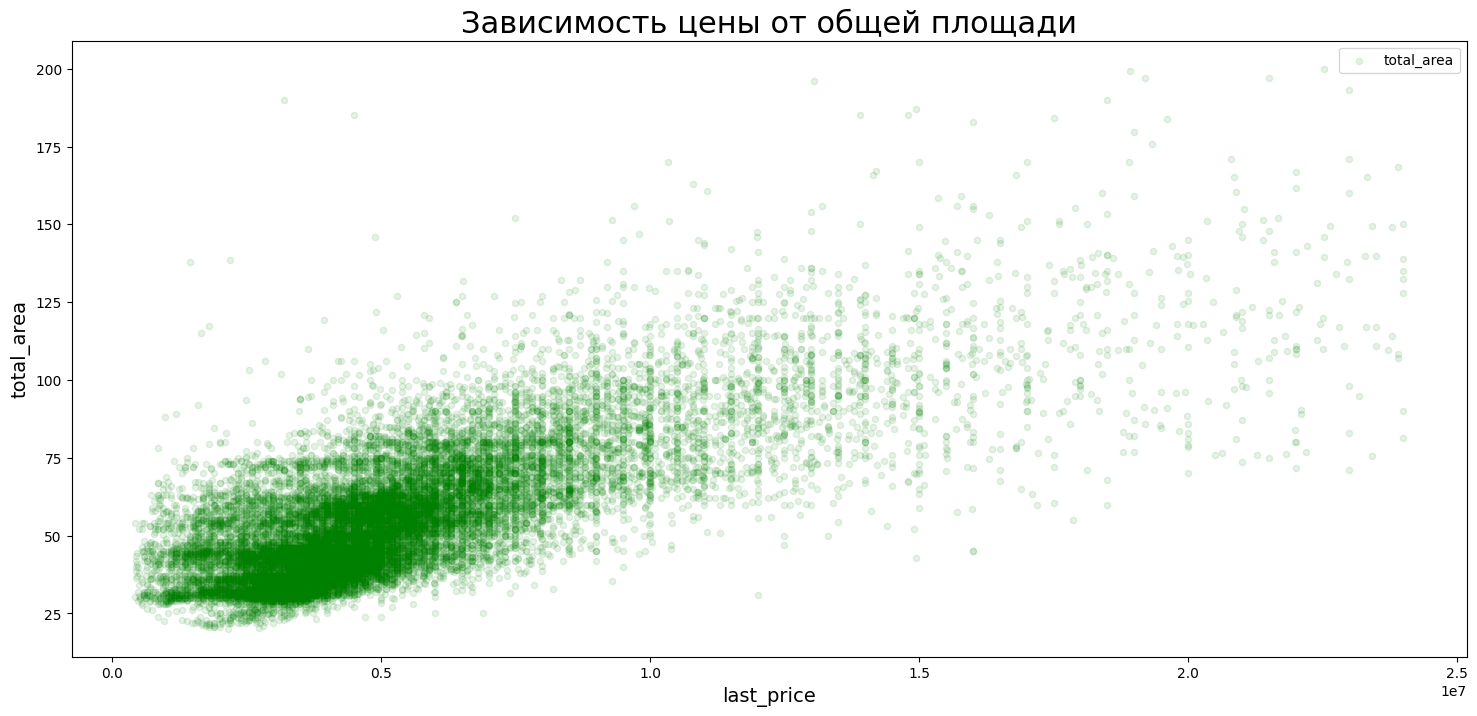

In [123]:
data.plot(x='last_price', 
          y='total_area', 
          kind='scatter',
          alpha=0.1, 
          figsize=(18,8), 
          color='g', 
          label= 'total_area')
plt.title('Зависимость цены от общей площади', size = 22)
plt.xlabel('last_price', size=14)
plt.ylabel('total_area', size=14)
plt.show()

In [124]:
data['last_price'].corr(data['total_area'])

0.7598029457529738

Высокая положительная корреляция между общей площадью квартиры и стоимость прослеживается. Но цена зависит не только от общей площади.


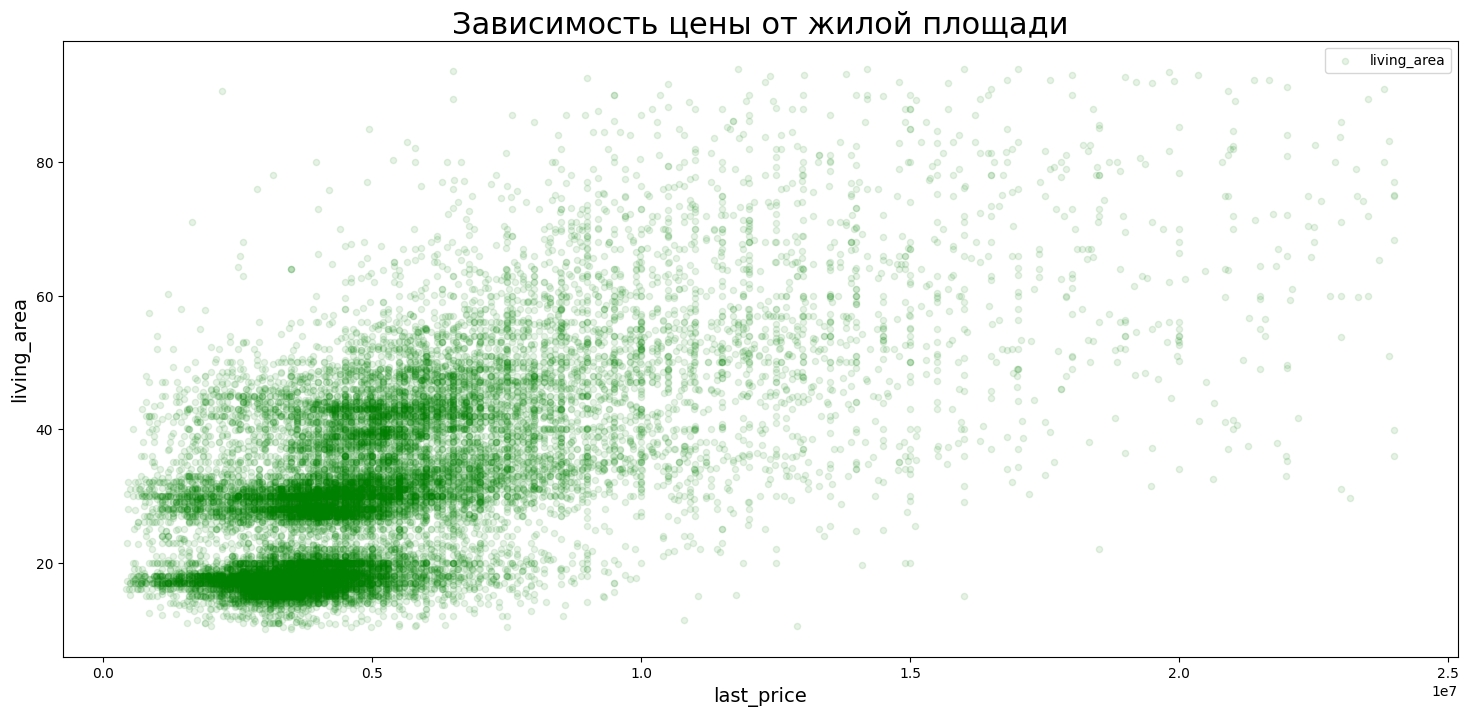

In [125]:
data.plot(x='last_price',
          y='living_area',
          kind='scatter',
          alpha=0.1,
          figsize=(18,8),
          color='g',
          label= 'living_area')
plt.title('Зависимость цены от жилой площади', size = 22)
plt.xlabel('last_price', size=14)
plt.ylabel('living_area', size=14)
plt.show()

In [126]:
data['last_price'].corr(data['living_area'])

0.6400283749225305

Заметная положительная корреляция между жилой площадью квартиры и стоимость прослеживается. Это следовало из корреляции общей площади.

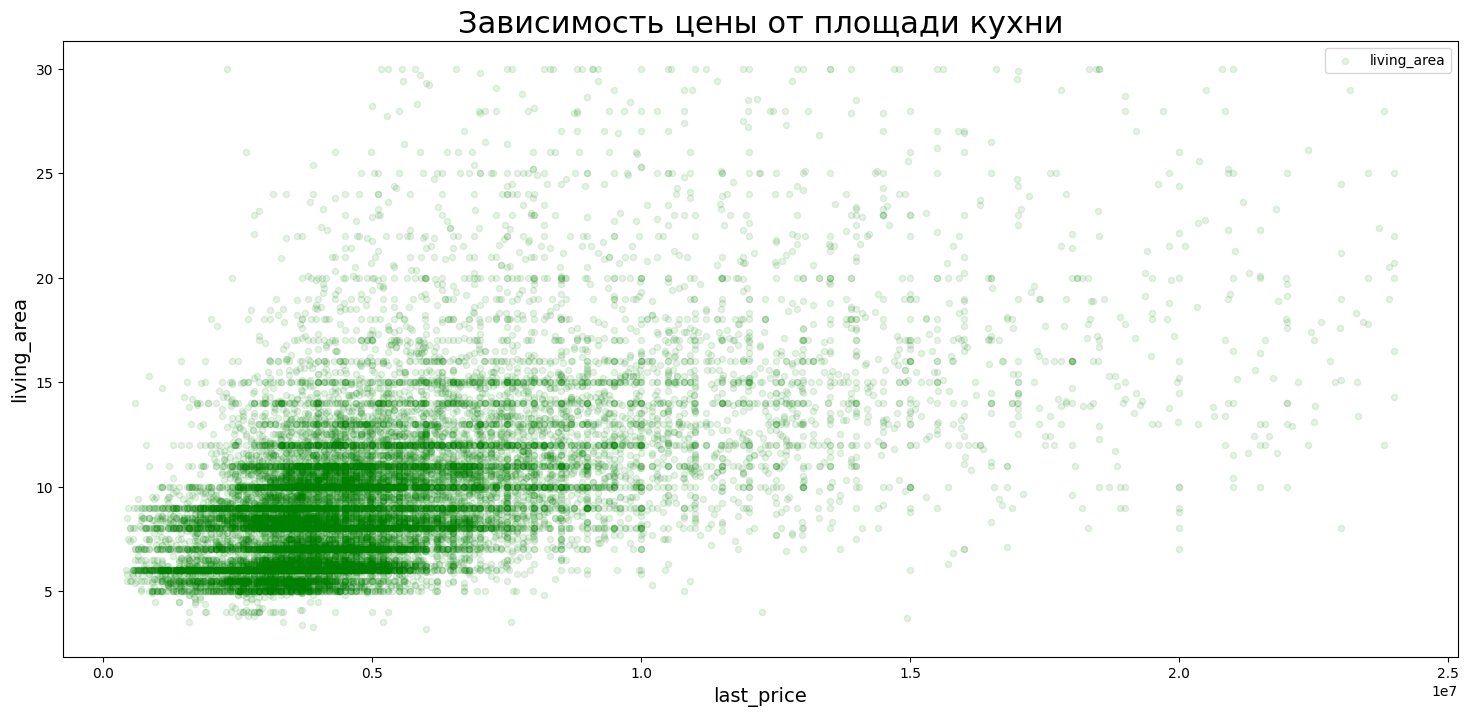

In [127]:
data.plot(x='last_price',
          y='kitchen_area',
          kind='scatter',
          alpha=0.1,
          figsize=(18,8),
          color='g',
          label= 'living_area')
plt.title('Зависимость цены от площади кухни', size = 22)
plt.xlabel('last_price', size=14)
plt.ylabel('living_area', size=14)
plt.show()

In [128]:
data['last_price'].corr(data['kitchen_area'])

0.5616092722285485

Заметная положительная корреляция между площадью кухни и стоимость прослеживается. Это следовало из корреляции общей площади.

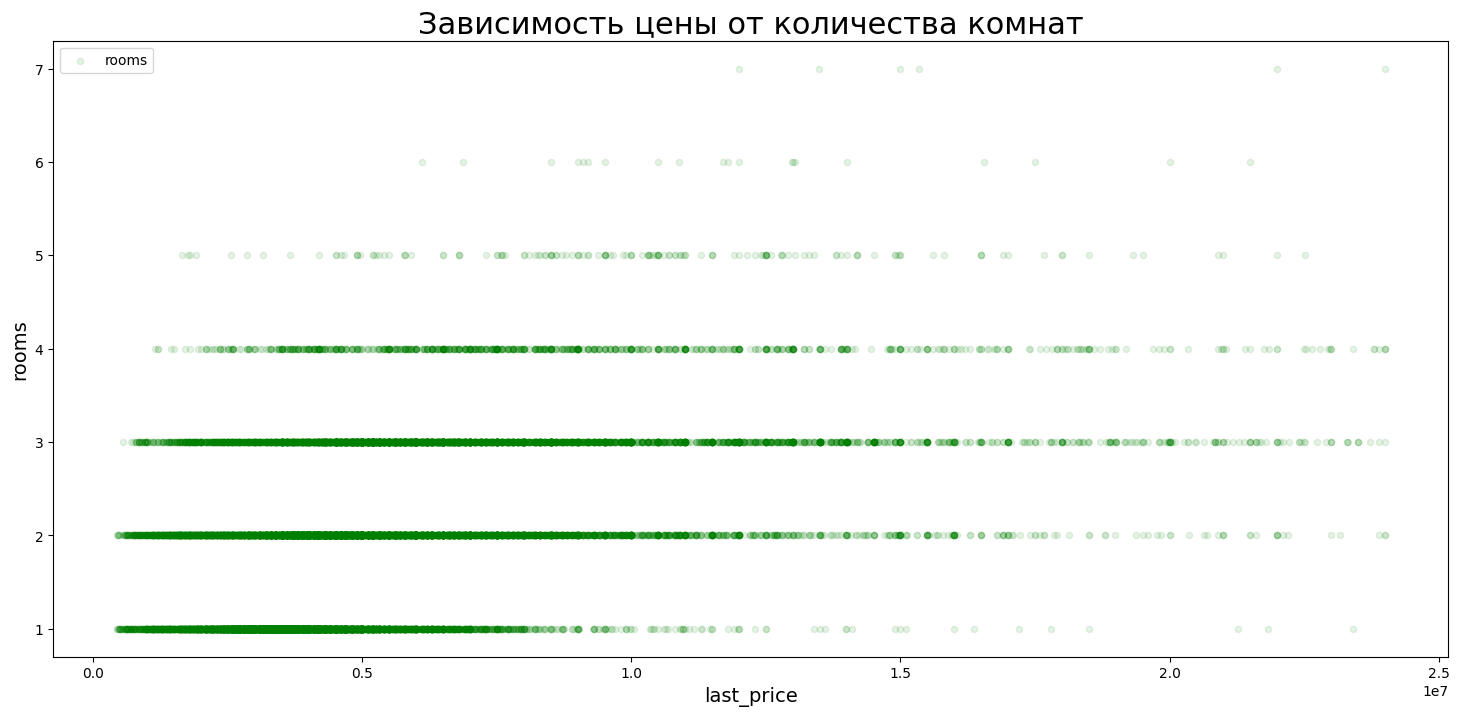

In [129]:
data.plot(x='last_price',
          y='rooms',
          kind='scatter',
          alpha=0.1,
          figsize=(18,8),
          color='g',
          label= 'rooms')
plt.title('Зависимость цены от количества комнат', size = 22)
plt.xlabel('last_price', size=14)
plt.ylabel('rooms', size=14)
plt.show()

In [130]:
data['last_price'].corr(data['rooms'])

0.46711253420532245

В целом, напрашивается вывод, что глобально цена зависит от общей площади, а вот от отдельно взятых комнат/кухонь/жилых/нежилых помещений - гораздо меньше. Это кажется вполне очевидным, так как мы рассматриваем продажи квартир целиком, а не аренду или что-либо еще. Корреляция количества комнат и цены - есть, но не сильная, что в очередной раз доказывает, что важнее площадь, чем кол-во комнат.

Посмотрим как себя ведет медиана площади и медиана цены за весь период наблюдений

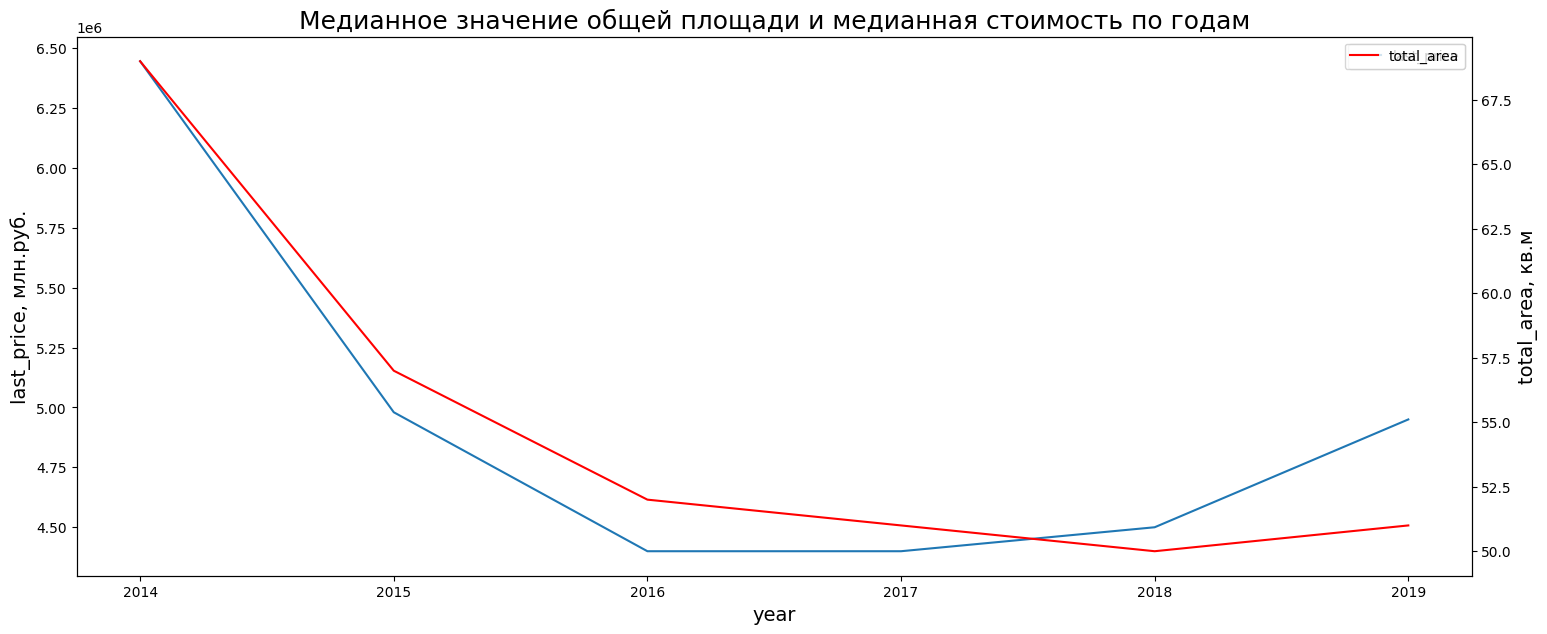

In [131]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
(
    data.pivot_table(index='year',
                 values='last_price',
                 aggfunc='median')
    .plot(y='last_price', 
          kind='line', 
          figsize=(18, 7),
          ax=ax
         )
)

(
    data.pivot_table(index='year',
                     values='total_area',
                     aggfunc='median')
    .plot(y='total_area',
          kind='line',
          color = 'r',
          figsize=(18, 7),
          ax=ax1
         )
)
ax.set_ylabel('last_price, млн.руб.', size=14)
ax1.set_ylabel('total_area, кв.м', size=14)
ax.set_xlabel('year', size=14)
plt.title('Медианное значение общей площади и медианная стоимость по годам', size = 18)
plt.show()

С 2014 года наблюдается падение как цены, так и площади квартир, вполь до 2017 года. С 2017 года по 2019 год наблюдаем рост цены за примерно одинаковые площади.

#### Зависимость от категории этажа

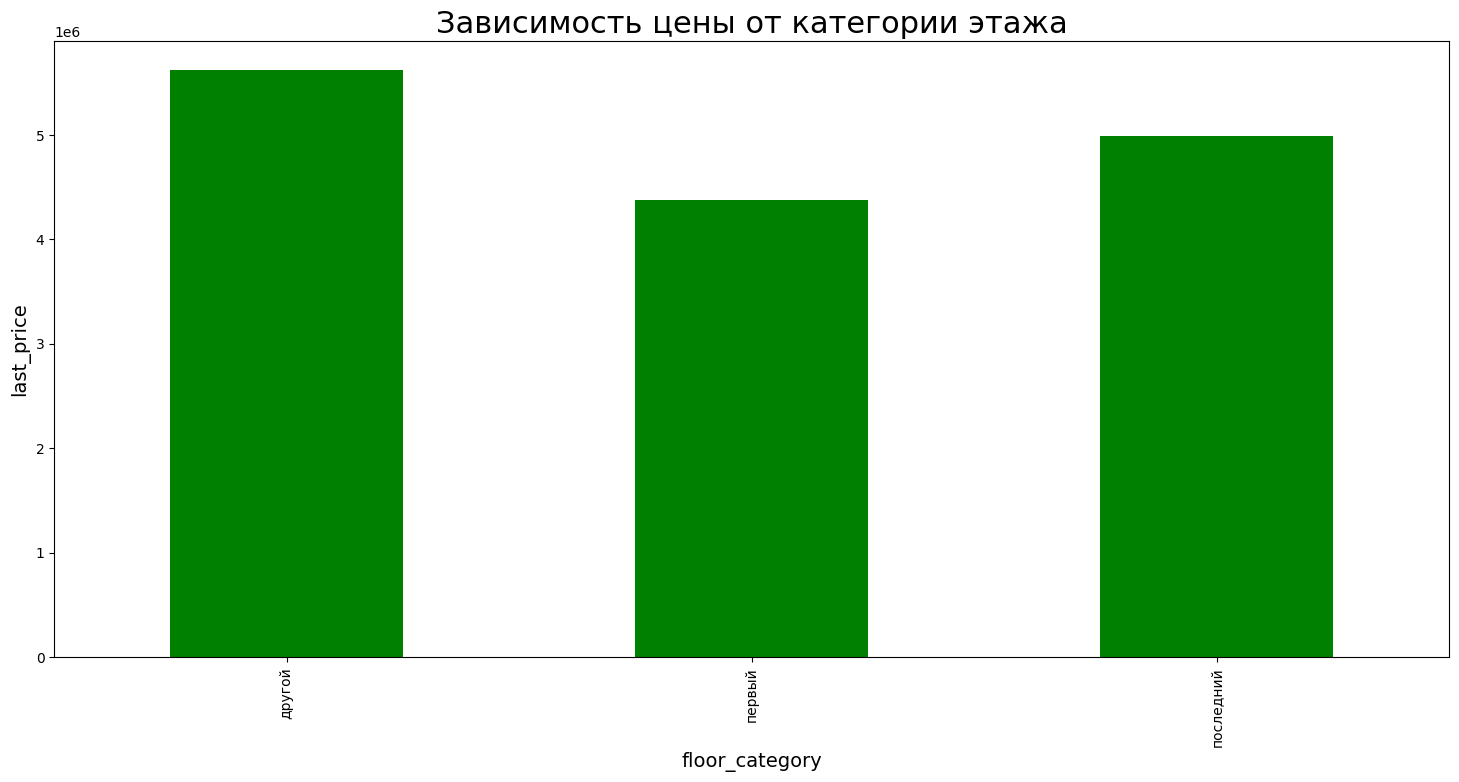

In [132]:
(
    data.groupby('floor_category')['last_price'].mean()
    .plot(kind='bar',
          figsize=(18,8),
          color='g')
)
plt.title('Зависимость цены от категории этажа', size = 22)
plt.xlabel('floor_category', size=14)
plt.ylabel('last_price', size=14)
plt.show()

На последних этаж чаще завышают цену, а на первых - занижают.

#### Зависимость от дня, месяца, года размещения.

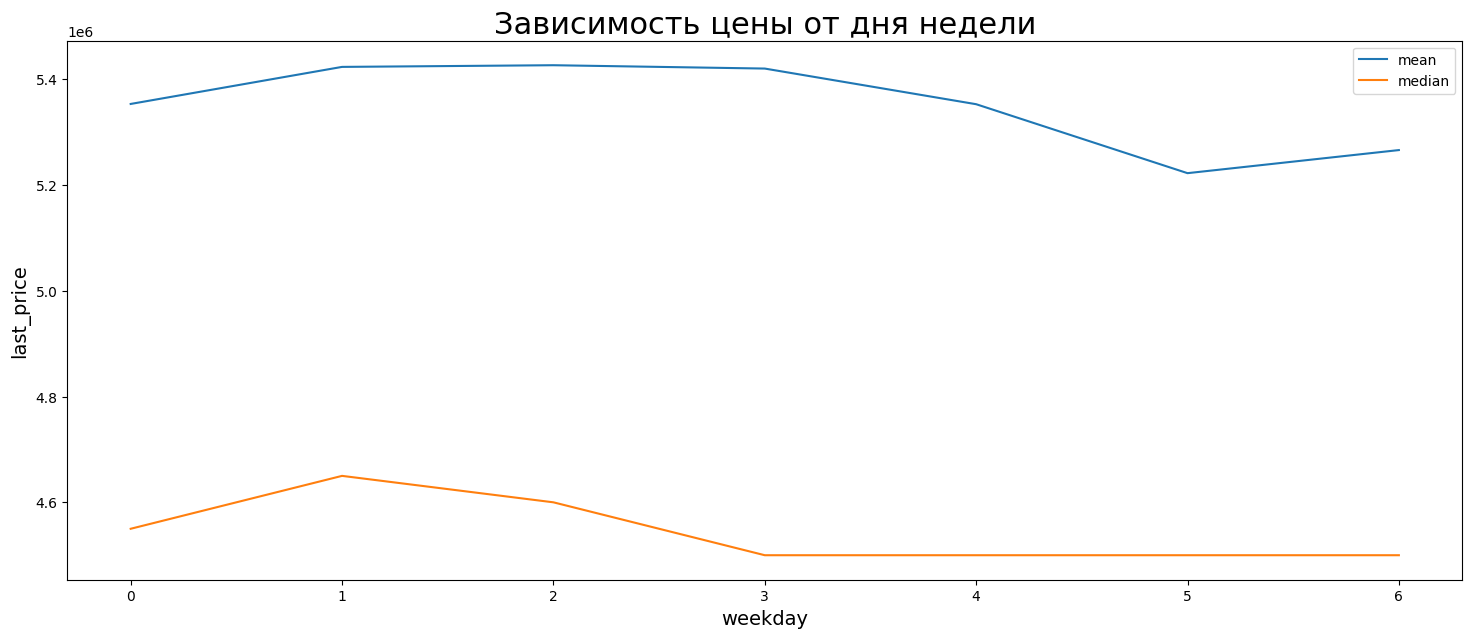

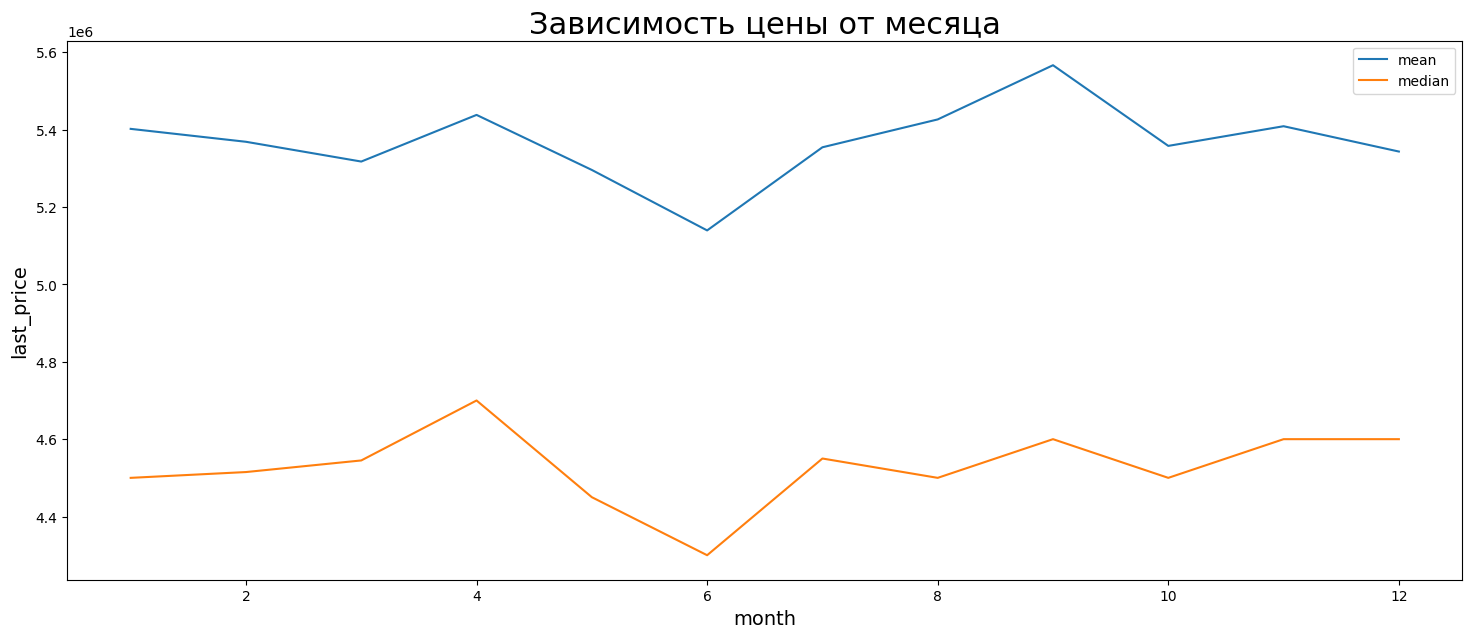

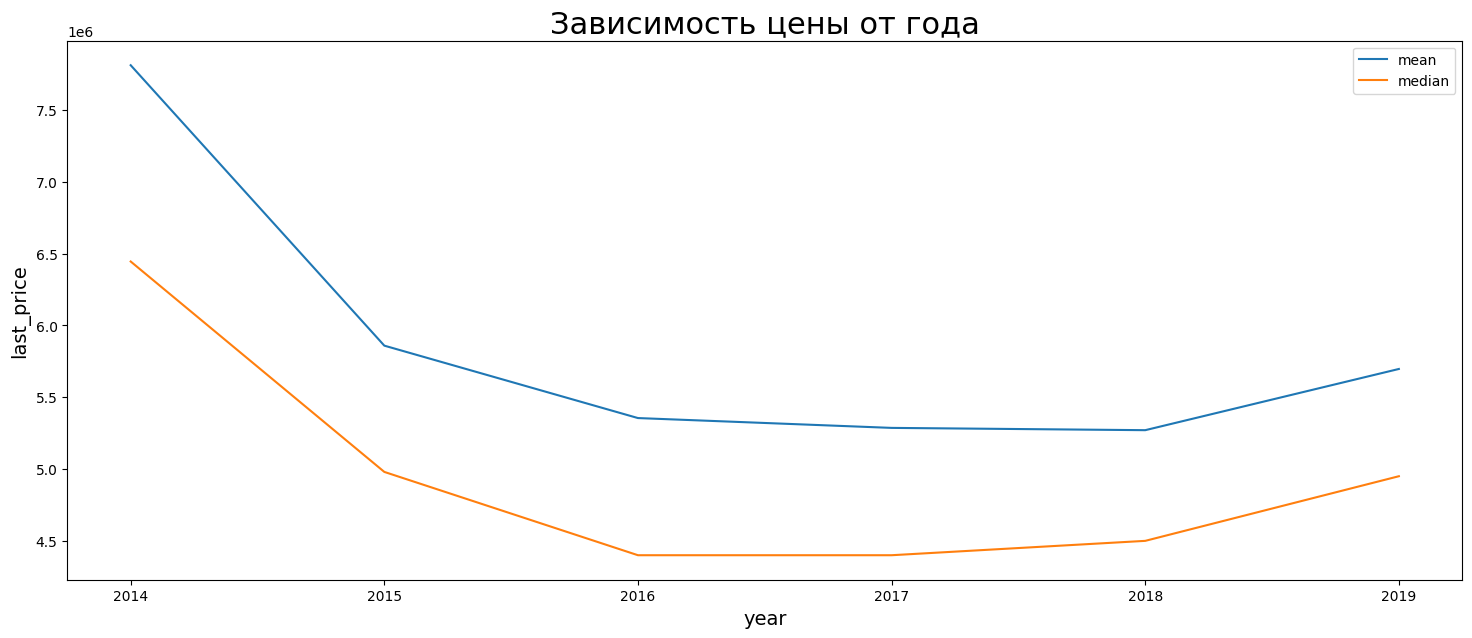

In [133]:
data.groupby('weekday')['last_price'].agg({'mean','median'}).plot(kind='line', title='mean',figsize=(18, 7))
plt.title('Зависимость цены от дня недели', size = 22)
plt.xlabel('weekday', size=14)
plt.ylabel('last_price', size=14)
plt.show()
data.groupby('month')['last_price'].agg({'mean','median'}).plot(kind='line', title='mean',figsize=(18, 7))
plt.title('Зависимость цены от месяца', size = 22)
plt.xlabel('month', size=14)
plt.ylabel('last_price', size=14)
plt.show()
data.groupby('year')['last_price'].agg({'mean','median'}).plot(kind='line', title='mean',figsize=(18, 7))
plt.title('Зависимость цены от года', size = 22)
plt.xlabel('year', size=14)
plt.ylabel('last_price', size=14)
plt.show()

#### Вывод

С увеличением площади - увеличивется цена, тут все стандартно. Отдельно взятые жилиые площади и площади кухонь - не сильно влиют на цену, в сравнении с общей площадью. Такая же ситуация с количеством комнат: понятно, что цена на 1-шку и 2-шку будут отличаться, но главным фактором является общая площадь помещения.

C 2014 года наблюдается падение медианной цен и медианного значения общей площади квартир, в плоть до 2017 года. Это можно обьяснить последствием экономического кризиса 2014 года, который привел к снижению цен и большому предложению на рынке недвижимости. Но с 2017 года и по 2019 год наблюдается рост цены за примерно такие же площади. Из чего делаем вывод, что цена за квадратный метр увеличилась.

Зависимость цены от категории этажа есть: на первых этажах, как правило занижают цены, на последних - завышают. В целом это общая тенденция, во многих городах России, где присутствуют многоэтажки. 

Также выяснилось, что покупать квартиры лучше в пятницу - вероятно люди уходя на выходные ставят цену поменьше, чтобы за выходные появилось больше запросов; цены растут к новому году и дешевеют к лету - это стандартная ситуация на рынке недвижимости.

### Средняя цена одного квадратного метра в 10 населенных пунктах.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [134]:
data_top10 = (
    data.groupby("locality_name")["cost_per_sqm"]
    .agg({'mean','count'})
    .round(2)
    .sort_values('count', ascending=False)
    .head(10)
)
data_top10

mean  count
locality_name                      
Санкт-Петербург    108811.78  14265
поселок Мурино      84821.46    443
поселок Шушары      78518.17    425
Всеволожск          67098.05    384
Пушкин             101896.31    345
Колпино             75270.16    334
Гатчина             68781.73    304
деревня Кудрово     92403.10    273
поселок Парголово   88913.18    250
Выборг              57898.60    227

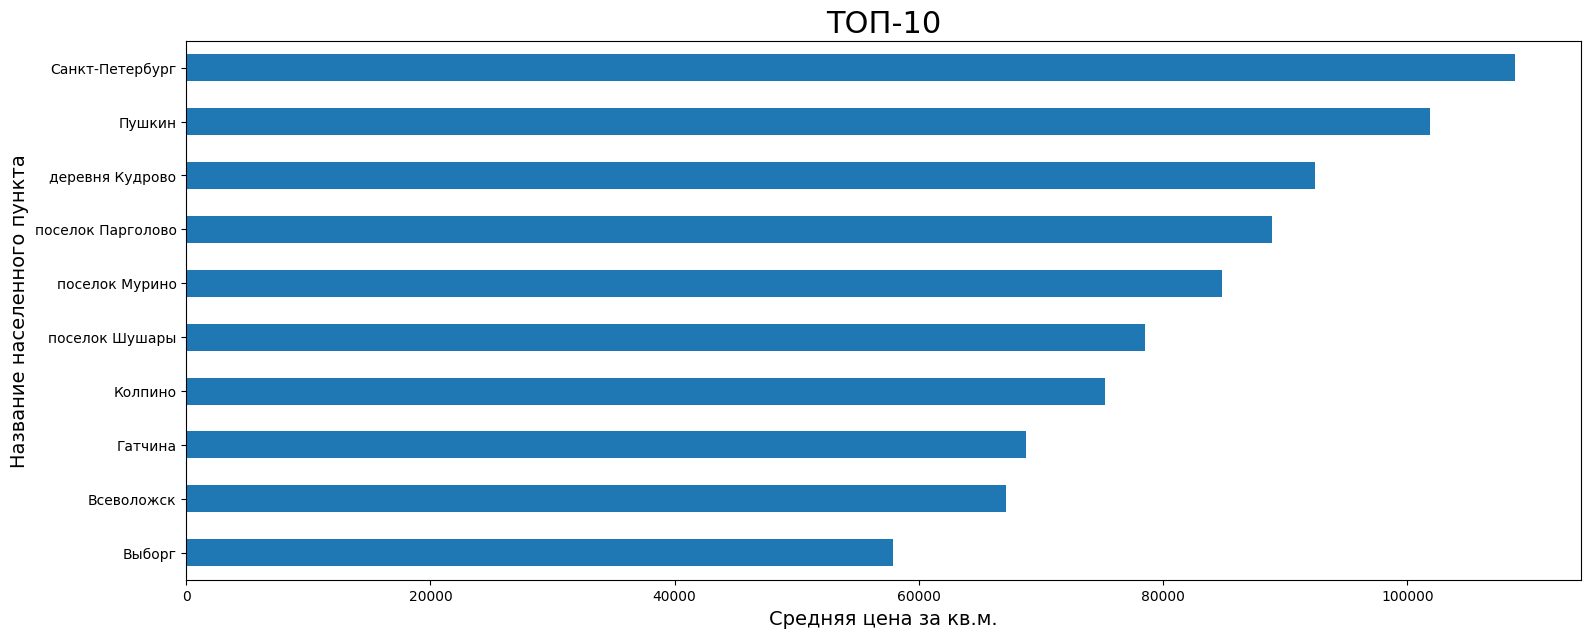

In [135]:
data_top10['mean'].sort_values().plot(kind='barh', figsize=(18, 7))
plt.title('ТОП-10', size = 22)
plt.xlabel('Средняя цена за кв.м.', size=14)
plt.ylabel('Название населенного пункта', size=14)
plt.show()

#### Самая высокая стоимость кв.м.

In [136]:
data[data["cost_per_sqm"] == data["cost_per_sqm"].max()]['locality_name']

14741    Санкт-Петербург
Name: locality_name, dtype: object

In [137]:
round(data["cost_per_sqm"].max(), 2)

387096.77

#### Самая низкая стоимость кв.м.

In [138]:
data[data["cost_per_sqm"] == data["cost_per_sqm"].min()]['locality_name']

14911    поселок станции Свирь
Name: locality_name, dtype: object

In [139]:
round(data["cost_per_sqm"].min(), 2)

7962.96

### Средняя цена каждого километра до центра.
Ранее было посчитано расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. Сделаем вывод о том, как стоимость объектов зависит от расстояния до центра города

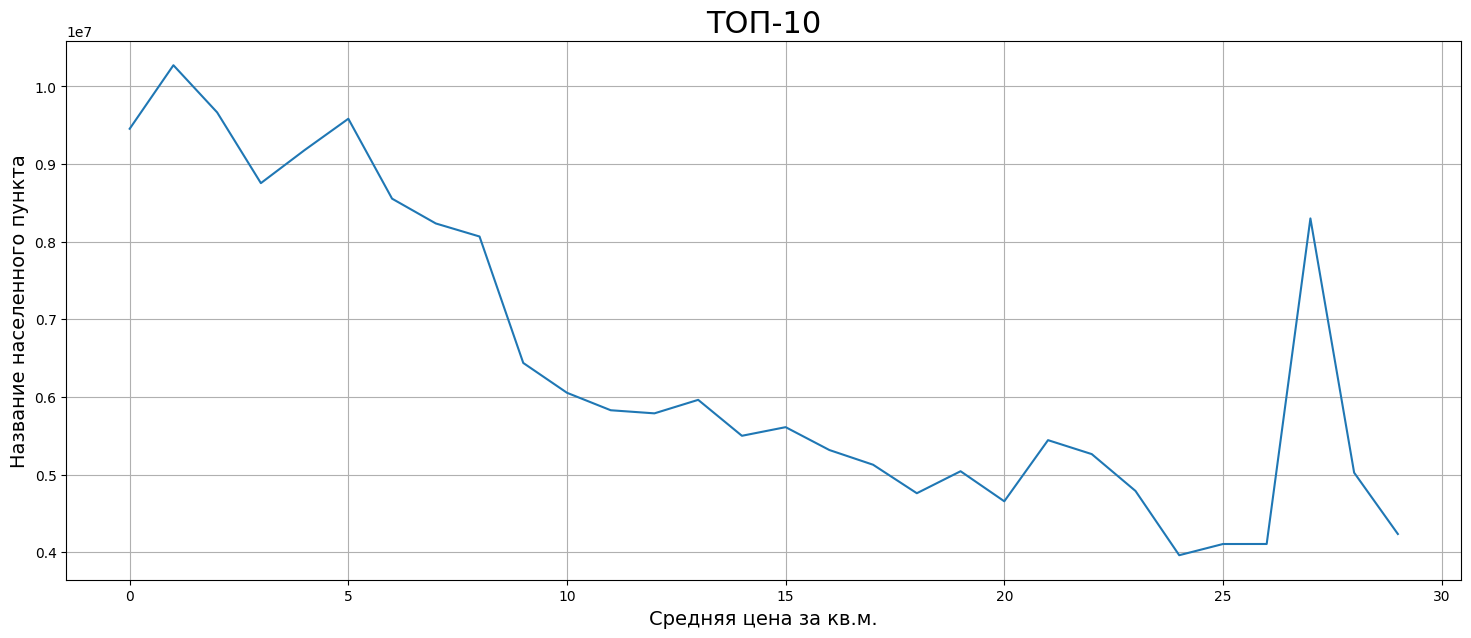

In [140]:
(
    data[data['locality_name'] == 'Санкт-Петербург']
    .groupby('city_centers_nearest_km')['last_price']
    .mean()
    .plot(figsize = (18, 7), grid=True)
)
plt.title('ТОП-10', size = 22)
plt.xlabel('Средняя цена за кв.м.', size=14)
plt.ylabel('Название населенного пункта', size=14)
plt.show()

Конечно, чем меньше расстояние от центра города, тем выше стоимость квартиры. В целом корреляция отрицательная, что подтверждает очевидность: "Чем дальше квартиры от центра - тем ниже стоимость" - очевидности тоже стоит проверять: есть небольшой всплеск на 27 км, возможно из-за района Петергофа - он как раз примерно на таком расстоянии от центра. Посмотрим на обьявления, квартиры которые находятся на 27 км от центра города.

In [141]:
data.loc[(data['city_centers_nearest_km'] == 27) & (data['locality_name'] == 'Санкт-Петербург')]

total_images  last_price  total_area first_day_exposition  rooms  \
748             13  14350000.0        74.0           2017-11-28      2   
5961             6   2250000.0        32.0           2018-02-27      1   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
748             3.13           5.0         30.0      3         False  ...   
5961            2.70           2.0         16.5      2         False  ...   

      parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
748          1496.0                 0          243.5            128.0   
5961          209.0                 0          243.5            178.0   

       cost_per_sqm  weekday  month  year  floor_category  \
748   193918.918919        1     11  2017          другой   
5961   70312.500000        1      2  2018       последний   

      city_centers_nearest_km  
748                      27.0  
5961                     27.0  

[2 rows x 28 columns]

На 27-м км две квартиры, в одной из которых очень завышена цена за квадратный метр, по этой причине мы отвергаем все гипотезы.

## Выводы

В выборке большинство квартир соответствуют такой "среднестатистической" квартире в СПб. Площадь около 50 кв.м, из них жилая - около 30-35, кухня - около 10, комнат обычно 2, потолки стандартные для СПб: 2,2-2,7 метра, находятся не высоко - до 11 этажа, чаще всего от 2 до 7 в малоэтажных зданиях, что соответствует реальности, так как в  центре СПб, чаще дома невысокие. От огромного большинства квартир недалеко парковая зона, в СПБ и ЛО много парков, поэтому тут очевидно.

Чаще всего объявления публикуются в будни, вероятно, из-за часов работы риелторов, а также ближе к НГ и после него, вероятно, обусловлено психологическими факторами, люди склонны менять что-то в жизни в этот период. В мае продажи падают - люди уезжают отдыхать или на дачу, в январе такая же ситуация - люди тоже отдыхают. Также можно сказать, что квартиры в среднем продаются за 92 дня, поэтому продажи длительностью меньше 40 и больше 200 дней можно считать необычайно быстрыми и долгими, соответственно. 

Больше всего объявлений приходится на СПб и близжайшие крупные населенные пункты. 

Главным фактором в цене является - общая площадь. С 2014 по 2017 гг. цены снижались, что было связано с последствиями кризиса 2014 года, а после начали расти. Самая дорогая цена за кв.м. при этом в Санкт-Петербурге, а самая дешевая - в поселке станции Свирь, что также объясняется расположением и величиной населенного пункта. 